# 0.Packages


In [1]:
%pip install ipython-autotime
%pip install networkx
%pip install neo4j
%pip install graphdatascience
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 13.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
time: 376 µs (started: 2024-12-16 23:18:52 +00:00)


In [2]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

time: 391 ms (started: 2024-12-16 23:18:52 +00:00)


## Download embedding model (BERT)


In [3]:
from sentence_transformers import SentenceTransformer

# embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embedding_model = SentenceTransformer('ckiplab/bert-base-chinese')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at ckiplab/bert-base-chinese and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

time: 49.4 s (started: 2024-12-16 23:18:52 +00:00)


## Install chineses font for matplotlib


In [4]:
import requests

# URL of the file you want to download
url = "https://www.freefontdownload.org/download-font/microsoft-jhenghei"
url_zip_filename = "microsoft-jhenghei_freefontdownload_org.zip"

# Send HTTP request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the file to disk
    with open(f"/content/{url_zip_filename}", "wb") as file:
        file.write(response.content)
    print(f"File downloaded and saved as '{url_zip_filename}' in Colab.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded and saved as 'microsoft-jhenghei_freefontdownload_org.zip' in Colab.
time: 2.91 s (started: 2024-12-16 23:19:42 +00:00)


In [5]:
import os
import zipfile


def unzip_and_overwrite(zipped_file, dest_dir):
    os.makedirs(dest_dir, exist_ok=True)
    with zipfile.ZipFile(zipped_file, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)

time: 1.89 ms (started: 2024-12-16 23:19:45 +00:00)


In [6]:
if os.path.exists('microsoft-jhenghei_freefontdownload_org.zip'):
    unzip_and_overwrite(
        zipped_file='microsoft-jhenghei_freefontdownload_org.zip', dest_dir='fonts')

time: 337 ms (started: 2024-12-16 23:19:45 +00:00)


In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'fonts/microsoft-jhenghei.ttf'
font_prop = fm.FontProperties(fname=font_path)
print(font_prop)

if not os.path.exists(font_path):
    raise FileNotFoundError(f"Font file not found: {font_path}")

fm.fontManager.addfont(font_path)

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# Check installed font path
font_path = fm.findfont('Microsoft JhengHei')
print(f"Font path: {font_path}")

sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=fonts/microsoft-jhenghei.ttf:size=10.0
Font path: /content/fonts/microsoft-jhenghei.ttf
time: 9.61 ms (started: 2024-12-16 23:19:45 +00:00)


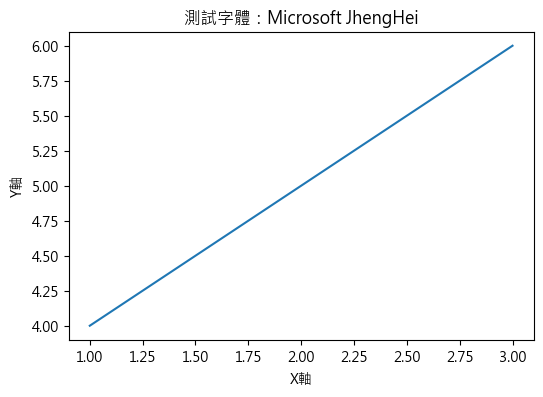

time: 394 ms (started: 2024-12-16 23:19:45 +00:00)


In [8]:
# Testing Chinese font
plt.figure(figsize=(6, 4))
plt.plot([1, 2, 3], [4, 5, 6])
plt.title('測試字體：Microsoft JhengHei')
plt.xlabel('X軸')
plt.ylabel('Y軸')
plt.show()

# 1.Configuration


## System prompt template


In [9]:
SYS_PROMPT_TPL: str = '\n'.join([
    ("You are an assistant specialized in interpreting divination results. "
     "Use the following [Context] to provide insights and advice to users based on their questions. "
     "Always format your responses according to the [Response Format] below, "
     "ensuring personalized interpretations and actionable advice."),
    "\n",
    "[Response Format] ",
    "您抽到的籤是: [Include 籤名 here] ",
    "籤詩: [Include full 籤詩 here] ",
    "\n",
    "籤詩解讀: ",
    "\n",
    "小廟公建議: ",
    "[Context] "
    "{context}"
    "\n"
    "Guidelines: "
    "- Interpret the provided [Context] flexibly. The \"籤詩解讀\" should connect the content of the divination with the user's question. "
    "- Use the \"小廟公建議\" to provide specific, actionable guidance relevant to the question, referencing details from the context where appropriate. "
    "- End with a short phrase encouraging the user, alike \"Don't worry\", \"Good luck\", etc. "
    "\n"
    "Note: "
    "If the length of the [Context] is less than 20 characters, provide the full [Context] directly as a response without applying the [Response Format]."
])

print(SYS_PROMPT_TPL)

You are an assistant specialized in interpreting divination results. Use the following [Context] to provide insights and advice to users based on their questions. Always format your responses according to the [Response Format] below, ensuring personalized interpretations and actionable advice.


[Response Format] 
您抽到的籤是: [Include 籤名 here] 
籤詩: [Include full 籤詩 here] 


籤詩解讀: 


小廟公建議: 
[Context] {context}
Guidelines: - Interpret the provided [Context] flexibly. The "籤詩解讀" should connect the content of the divination with the user's question. - Use the "小廟公建議" to provide specific, actionable guidance relevant to the question, referencing details from the context where appropriate. - End with a short phrase encouraging the user, alike "Don't worry", "Good luck", etc. 
Note: If the length of the [Context] is less than 20 characters, provide the full [Context] directly as a response without applying the [Response Format].
time: 2.22 ms (started: 2024-12-16 23:19:59 +00:00)


## RAG context template


In [10]:
RAG_TPL: str = '\n'.join([
    "籤名: 【{吉凶}】{詩運} {籤名}-{詩名} ",
    "\n",
    "~籤詩~ ",
    "{籤詩}",
    "\n",
    "{詳解}",
    "\n",
    "小廟公建議可參考聖意如下, 不需要全數給求籤者, 若有任何難或不利的訊號, 則建議小心慎重, 正向訊號則可達成! ",
    "{聖意}",
    "\n",
    "潛在的指示為地支「{地支}」, 也可給求籤者做相關提醒: ",
    " - 地理位置代表{方位} ",
    " - 時間為{時間} ",
    " - 十二生肖對應為{生肖}, {生肖特色}, {生肖從事} ",
    " - 五行為「{五行}」, {五行}生{相生}但{五行}剋{相剋}, 若為上籤宜{五行上籤}等, 若為下籤則注意{五行下籤}等 ",
])

print(RAG_TPL)

籤名: 【{吉凶}】{詩運} {籤名}-{詩名} 


~籤詩~ 
{籤詩}


{詳解}


小廟公建議可參考聖意如下, 不需要全數給求籤者, 若有任何難或不利的訊號, 則建議小心慎重, 正向訊號則可達成! 
{聖意}


潛在的指示為地支「{地支}」, 也可給求籤者做相關提醒: 
 - 地理位置代表{方位} 
 - 時間為{時間} 
 - 十二生肖對應為{生肖}, {生肖特色}, {生肖從事} 
 - 五行為「{五行}」, {五行}生{相生}但{五行}剋{相剋}, 若為上籤宜{五行上籤}等, 若為下籤則注意{五行下籤}等 
time: 682 µs (started: 2024-12-16 23:20:00 +00:00)


## Mapping Table

籤詩, 地支, 五行, 時辰, 方位, 生肖..

統計: 大吉籤 8 支, 上吉籤 2 支, 上上籤 28 支, 上中籤 4 支, 上平籤 3 支, 上籤 1 支, 中吉、中上、中中、中平、中這個等級類別的籤共 25 支, 平中籤、平平籤、平籤各 1 支, 無標示的籤 25 支, 下下籤 1 支
加起來 100 支籤詩, 共 16 個吉凶的等級分類。
By [關於聖意] https://vocus.cc/article/60cc311efd8978000139e6c2

![](https://s1.astrologs.net/489fa60ffe094cb6b9e431d29164129c332507.jpg)
![](https://s1.astrologs.net/00863e956d804118b14f7761085abdaf643933.jpg)
![](https://s1.astrologs.net/7b135058418e40c2ad656470a47d0135244692.jpg)
![](https://s1.astrologs.net/639bd26c3de946f5876a2df721175f3b511769.jpg)
By [星玄説](https://astrologs.net/a/9kog8bd821/)


In [13]:
# 籤詩數據
TOTAL_LOTS = 100
UNKNOWN_LOT_RESULT = '__'  # 詩運
DEFAULT_RESULT_GROUP = '中籤'
LOT_RESULT_GROUPs = ['上籤', '中籤', '下籤']
LOT_12_ZIs = ['丑宮', '亥宮', '午宮', '卯宮', '子宮', '寅宮',
              '巳宮', '戌宮', '未宮', '申宮', '辰宮', '酉宮']
LOT_RESULTs = ['__',  # unknown
               '大吉', '上吉', '上上', '上中', '上平', '上',
               '中吉', '中上', '中中', '中平', '中',
               '平中', '平平', '平',
               '下', '下下']
LOT_RESULT_MAP = dict(
    __='中籤',  # unknown
    大吉='上籤',
    上吉='上籤',
    上上='上籤',
    上中='上籤',
    上平='上籤',
    上='上籤',
    中吉='中籤',
    中上='中籤',
    中中='中籤',
    中平='中籤',
    中='中籤',
    平中='中籤',
    平平='中籤',
    平='中籤',
    下='下籤',
    下下='下籤',
)

# 定義地支、生肖和五行的對應關係
ZIs = ['子', '丑', '寅', '卯', '辰', '巳', '午', '未', '申', '酉', '戌', '亥']

# FiveElement 五行
ELEMENTs = ['金', '木', '水', '火', '土']

# 相生 相剋
ELEMENT_CYCLE_MAP = dict(
    金={'生': '水', '剋': '木'},
    木={'生': '火', '剋': '土'},
    水={'生': '木', '剋': '火'},
    火={'生': '土', '剋': '金'},
    土={'生': '金', '剋': '水'},
)

# 地支 - 生肖
ZI_ZODIAC_MAP = dict(
    子='鼠',
    丑='牛',
    寅='虎',
    卯='兔',
    辰='龍',
    巳='蛇',
    午='馬',
    未='羊',
    申='猴',
    酉='雞',
    戌='狗',
    亥='豬'
)

# 地支 - 五行
ZI_ELEMENT_MAP = dict(
    子='水',
    丑='土',
    寅='木',
    卯='木',
    辰='土',
    巳='火',
    午='火',
    未='土',
    申='金',
    酉='金',
    戌='土',
    亥='水'
)

# 地支 - 四季
ZI_SEASON_MAP = dict(
    子='冬',
    丑='四季',
    寅='春',
    卯='春',
    辰='四季',
    巳='夏',
    午='夏',
    未='四季',
    申='秋',
    酉='秋',
    戌='四季',
    亥='冬'
)

# 地支 - 方位,時辰
ZI_LOC_MAP = dict(
    子={'location': '北方', 'time': '晚上11點至凌晨1點'},
    丑={'location': '東北', 'time': '凌晨1點至3點'},
    寅={'location': '東北', 'time': '凌晨3點至5點'},
    卯={'location': '東方', 'time': '早上5點至7點'},
    辰={'location': '東南', 'time': '早上7點至9點'},
    巳={'location': '東南', 'time': '上午9點至11點'},
    午={'location': '南方', 'time': '中午11點至下午1點'},
    未={'location': '西南', 'time': '下午1點至3點'},
    申={'location': '西南', 'time': '下午3點至5點'},
    酉={'location': '西方', 'time': '下午5點至7點'},
    戌={'location': '西北', 'time': '晚上7點至9點'},
    亥={'location': '西北', 'time': '晚上9點至11點'},
)

# 生肖
ZODIACs = ['龍', '兔', '馬', '牛', '蛇', '豬', '羊', '猴', '狗', '鼠', '虎', '雞']

# 生肖 - 個性, 從事
ZODIAC_ATTR_MAP = dict(
    鼠={'personalities': ['機智', '靈活'], 'works': ['適合從事需要快速反應的工作']},
    牛={'personalities': ['勤奮', '穩重'], 'works': ['適合從事需要耐力和毅力的工作']},
    虎={'personalities': ['勇敢', '冒險'], 'works': ['適合從事需要勇氣和決斷力的工作']},
    兔={'personalities': ['溫和', '謹慎'], 'works': ['適合從事需要細心和耐心的工作']},
    龍={'personalities': ['自信', '領導'], 'works': ['適合從事需要創新和領導力的工作']},
    蛇={'personalities': ['智慧', '神秘'], 'works': ['適合從事需要策略和洞察力的工作']},
    馬={'personalities': ['熱情', '奔放'], 'works': ['適合從事需要活力和創意的工作']},
    羊={'personalities': ['溫柔', '善良'], 'works': ['適合從事需要關懷和同理心的工作']},
    猴={'personalities': ['聰明', '機智'], 'works': ['適合從事需要靈活和創意的工作']},
    雞={'personalities': ['勤奮', '細心'], 'works': ['適合從事需要細心和耐心的工作']},
    狗={'personalities': ['忠誠', '可靠'], 'works': ['適合從事需要信任和責任感的工作']},
    豬={'personalities': ['樂觀', '豁達'], 'works': ['適合從事需要樂觀和積極性的工作']},
)

# 五行 - goods, bads
ELEMENT_ADVICE = dict(
    金={
        '上籤': ['金融投資', '金屬工藝', '珠寶首飾', '學習理財', '健身鍛煉'],
        '下籤': ['過度消費', '金屬傷害', '金融風險', '過度勞累']
    },
    木={
        '上籤': ['園藝種植', '森林散步', '學習新知識', '創意工作', '綠色環保'],
        '下籤': ['過度勞累', '木製品傷害', '過度依賴', '環境污染']
    },
    水={
        '上籤': ['旅行', '水邊活動', '游泳', '學習水性', '水療按摩'],
        '下籤': ['游泳風險', '水邊活動安全', '過度飲水', '水污染']
    },
    火={
        '上籤': ['烹飪', '熱情工作', '學習新技能', '社交活動', '創意表達'],
        '下籤': ['高溫環境', '火災風險', '過度熱情', '火氣過旺']
    },
    土={
        '上籤': ['土地耕作', '建築設計', '學習歷史', '穩定工作', '家庭聚會'],
        '下籤': ['過度勞累', '土石傷害', '過度保守', '環境破壞']
    }
)

LOT_CONTEXT_KEYS = ['籤名', '詩名', '詩運', '籤詩', '吉凶', '宮位',
                    '詩意', '解曰', '淺釋', '靈籤', '詳解']

LOT_PURPOSE_KEYS = [
    "家宅",
    "自身",
    "求財",
    "交易",
    "婚姻",
    "六甲",
    "行人",
    "田蠶",
    "六畜",
    "尋人",
    "公訟",
    "移徙",
    "失物",
    "疾病",
    "山墳"
]

LOT_PURPOSE_ANSWERS = dict(
    家宅={'欠安（大吉）', '先凶后吉', '旺', '大利', '安', '慎出', '利', '平常', '損失', '吉', '若前', '祈保（吉）', '不安', '許願', '口舌', '還願', '不利',
        '守舊', '欠安', '大吉', '祈保', '清吉', '平安', '欠利', '平吉', '心只', '憂疑', '中平', '平平', '祈福', '作福', '吉利', '凶', '亂', '不利（漸安）'},
    自身={'困滯', '順利', '康泰', '安', '路行', '許經', '平常', '災耗', '秋冬大利', '秋冬旺', '還願（大吉）', '欠吉（凶。注意健康）', '吉', '平', '夏秋吉', '阻', '吉隨', '利安', '平穩', '口舌', '順利（不順）', '還願', '守慎', '順', '謹防',
        '不利', '祈保', '提防', '欠利', '欠吉（先凶后吉）', '吉（待運至）', '泰', '謹慎', '小人', '防', '中平', '平平', '冬吉', '秋冬吉', '中吉', '險', '祈福', '阻滯', '作福', '吉利', '安（運滯。唯仁可解）', '是非', '利', '謹防（凶中有吉）'},
    求財={'佳順', '中平（休想）', '大利', '難', '順利（甭想）', '未成', '好', '遂', '西方', '秋冬大利', '秋冬旺', '秋旺', '利西', '破', '吉', '阻', '破失', '未有', '著力', '守份', '不平', '大前', '守慎', '順', '不利', '得利', '春利', '遂意',
        '欠利', '虛', '微微', '待時', '有', '春旺', '謹慎', '小人', '中平', '秋吉', '平平', '勞力', '合', '秋冬吉', '中吉', '守待', '平常（切忌）', '破耗', '阻滯', '謹守', '未遇', '有利', '頗有', '勞心', '成', '正勝', '順遂', '利'},
    交易={'旺', '難', '一可', '未成', '平常', '遂', '損失', '吉', '平', '成（且慢）', '阻', '宜遲', '順利（且慢）', '滯', '難成', '早斷', '諸祭', '勝', '穩', '反覆', '允',
        '謹防', '貴人', '不利', '不合', '遂意', '大吉', '諸求', '未指示', '待時', '謹慎', '小人', '中平', '平平', '合', '敗', '破耗', '阻滯', '不成', '遲', '成', '慎重', '利'},
    婚姻={'成合', '刑剋', '難', '好合', '未成', '好', '難合', '刑傷', '難順', '阻', '條向', '宜遲', '遂（慎）', '合（遇佳婿）', '遲滯', '不就', '成就', '有阻', '遲成', '事解', '遲合', '隨意',
        '事之', '不長', '未許', '不合', '阻隔', '虛', '待時', '未就', '中平', '平平', '就', '未合', '和合', '再合', '合', '中吉', '祈福', '阻滯', '有成', '不成', '遲', '成', '雙配'},
    六甲={'安', '有險', '有驚', '生男', '刑損', '阻', '刑劫', '平安（生肖子）', '女', '事順', '喜', '虛驚（有寶）', '防驚', '生女', '添孫', '虛驚', '有虛', '危險',
        '平安', '祈保', '虛', '驚', '虛險', '煞旺', '虛（女）', '安（空孕）', '男。驚', '春實秋虛', '險', '祈福', '虛花', '作福', '祈保（空寶。防小產）', '男', '先虛后實'},
    行人={'有危', '到', '近', '諸順', '吉', '至', '阻', '未至', '見', '滯', '有災', '有阻', '杳', '順',
        '有信', '平安', '祈保', '阻隔', '財更', '未指示', '遲至', '留連', '未回', '困', '阻滯', '動', '遲', '回'},
    田蠶={'旺', '半熟', '早種', '好', '晚成', '虧', '功貴', '少收', '七分', '吉', '宜早種', '平', '早生', '晚收', '八分', '阻', '晚勝', '少', '滯', '宜早', '平穩', '晚豐',
        '半收', '著力', '晚', '穩', '五分', '十足', '不利', '興', '可養', '損', '熟', '用向', '中平', '秋吉', '多災', '就', '不收', '秋利', '祈福', '秋熟', '缺', '半吉', '利'},
    六畜={'旺', '瘟', '難', '安', '大利（失利）', '好', '少收', '平', '阻', '滯', '平穩', '勝', '穩', '不利', '興', '慎吉',
        '衰', '春利', '可養', '欠利', '損', '難養', '春旺', '問有', '莫養', '尾利', '中可', '多災', '中平', '成', '勤理', '利'},
    尋人={'招非', '難', '西方', '至', '阻', '見', '滯', '見（難）', '杳', '隔', '有信', '遇',
        '無蹤', '阻隔', '未指示', '名人', '勤', '事前', '難（見）', '未遇', '遲', '西', '至（凶）', '勞'},
    公訟={'虧（莫興）', '擱', '意昌', '盈氣', '有理', '虧', '吉', '宜和', '急斷', '和', '散',
        '延', '勝', '有貴人', '反覆', '不利', '驚', '和（即止訟）', '禍', '和（勿興）', '變'},
    移徙={'去', '旺', '安', '如意', '宜遷', '平常（甭提）', '平', '吉', '改', '舊安', '舊', '勿動', '莫動', '守', '昌盛',
        '隨意', '興', '守舊', '難（遠可）', '不利', '不合', '大吉', '祈保', '欠吉', '更新', '未指示', '待時', '吉（不吉）', '利'},
    失物={'東西', '遠', '難', '帶', '西方', '難（空', '在', '北方', '阻', '見', '速尋', '得見', '西北', '空', '東北',
        '西方(註：北方屬水。西方屬金）', '無蹤', '虛', '南方', '難尋', '未指示', '不見', '急尋', '西', '南', '即見', '祈福', '東南', '凶', '凶病', '遲見', '無', '難見', '東方'},
    疾病={'解', '禳星（得祖蔭）', '安', '有驚', '難痊', '禳星', '安然', '遇良醫', '祈保（凶）', '阻', '祭虎', '犯羅網', '有阻', '延', '喜', '即設送', '拜送（兔年或屬兔凶）', '還願', '反覆', '虛驚', '欠安', '急求神',
        '祈保', '設送', '阻隔', '險阻', '未指示', '延安', '憂危', '即痊愈', '設送。安', '秋吉', '即安', '延纏', '求神保佑', '設送（必癒）', '有災險', '求福', '祈福', '犯陰', '還舊願', '作福', '延滯', '遇良方'},
    山墳={'安吉', '安', '利', '守舊大吉', '吉', '平', '東西向吉', '改', '暫安', '不安', '西向', '舊吉', '大吉利', '不阻', '宜改', '改向吉', '宜修',
        '豐喜', '如吉', '不利', '守舊', '大吉', '絕', '發', '東西吉', '南利', '中平', '擇地', '平平', '敗', '凶', '勿改', '宜舊', '不吉'},
)

time: 4.37 ms (started: 2024-12-16 23:20:01 +00:00)


## PoemUtil

- Helper class for handling poem-related data


In [11]:
from pandas import DataFrame


class PoemUtil:
    """籤詩(poem) helper"""

    RAG_TPL: str = RAG_TPL  # Template for RAG content

    @staticmethod
    def create_data(id: int) -> dict:
        """Create a dictionary structure for a poem."""

        return {
            'id': id,
            '籤名': '第?首',  # Example: 第九十九首
            '詩名': '',  # Poem title
            '詩運': '',  # Poem fortune
            '籤詩': [],  # Four-line poem
            '吉凶': '',  # Fortune type (mapping afterwards)
            '宮位': '',  # Earthly branch position
            '詩意': '',  # Poem meaning
            '解曰': '',  # Interpretation
            '聖意': {},  # Divine intentions
            '淺釋': '',  # Simplified explanation
            '靈籤': '',  # Spiritual significance
            '詳解': '',  # Detailed explanation
            'img_url': '',  # Image URL
            'img_fname': '',  # Image filename
        }

    @staticmethod
    def str_divine(divine_dict: dict) -> str:
        """Convert a dictionary of 聖意 dictionary into a formatted string."""
        return '\n'.join([f'{k}: {v}' for k, v in divine_dict.items()])

    @staticmethod
    def get_value_by_index(
        df: DataFrame,
        idx: int,
        col_name: str,
        default_value=None
    ):
        """Retrieve a value from the DataFrame by index and column name."""

        try:
            return df.loc[idx, col_name]  # Access using label index
        except KeyError:
            return default_value  # Return default if the column doesn't exist

    @staticmethod
    def format_rag_content(
        df: DataFrame,
        lot_idx: int
    ) -> str:
        """Format the RAG content based on the DataFrame and index."""

        col_value = PoemUtil.get_value_by_index
        try:
            地支 = col_value(df, lot_idx, '宮位')[0]
            五行 = ZI_ELEMENT_MAP[地支]
            生肖 = ZI_ZODIAC_MAP[地支]
            data = {
                '籤名': col_value(df, lot_idx, '籤名'),
                '詩名': col_value(df, lot_idx, '詩名'),
                '詩運': col_value(df, lot_idx, '詩運'),
                '籤詩': '\n'.join([v.ljust(12) for v in col_value(df, lot_idx, '籤詩')]),
                '吉凶': col_value(df, lot_idx, '吉凶'),
                '地支': 地支,
                '詳解': col_value(df, lot_idx, '詳解'),
                '聖意': '\n'.join([f'{k}: {v}' for k, v in col_value(df, lot_idx, '聖意').items()]),
                '方位': ZI_LOC_MAP[地支]['location'],
                '時間': ZI_LOC_MAP[地支]['time'],
                '生肖': 生肖,
                '五行': 五行,
                '生肖特色': '、'.join(ZODIAC_ATTR_MAP[生肖]['personalities']),
                '生肖從事': '、'.join(ZODIAC_ATTR_MAP[生肖]['works']),
                '相生': ELEMENT_CYCLE_MAP[五行]['生'],
                '相剋': ELEMENT_CYCLE_MAP[五行]['剋'],
                '五行上籤': ', '.join(ELEMENT_ADVICE[五行]['上籤']),
                '五行下籤': ', '.join(ELEMENT_ADVICE[五行]['下籤']),
            }
            return PoemUtil.RAG_TPL.format(**data)
        except Exception as e:
            print(e)
            return None

time: 2.25 ms (started: 2024-12-16 23:20:00 +00:00)


## TokenizerUtil


In [12]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from typing import Union


class TokenizerUtil:
    """Utility class for text embedding and similarity calculations."""

    # Class-level variable to store the model
    _embedding_model: SentenceTransformer = None

    @classmethod
    def initialize_model(cls) -> None:
        """Initializes the SentenceTransformer model."""

        if cls._embedding_model is None:
            cls._embedding_model = SentenceTransformer(
                'ckiplab/bert-base-chinese')

    @staticmethod
    def get_word_embedding(word: str) -> list[float]:
        """Encodes a word into a numerical representation."""

        # return TokenizerUtil._embedding_model.encode(word).tolist()
        return TokenizerUtil.flatten_list(TokenizerUtil._embedding_model.encode(word))

    @staticmethod
    def flatten_list(nested_list: Union[list[list], list]) -> list:
        """Flattens a nested list into a single list."""

        return [item for sublist in nested_list for item in sublist] \
            if isinstance(nested_list, list) and nested_list and isinstance(nested_list[0], list) \
            else nested_list

    @staticmethod
    def compute_cosine_similarity(text1: str, text2: str) -> float:
        """Calculates the cosine similarity between two texts."""

        embedding1 = TokenizerUtil.get_word_embedding(text1)
        embedding2 = TokenizerUtil.get_word_embedding(text2)
        return cosine_similarity([embedding1], [embedding2])[0][0]

    @staticmethod
    def pairwise_cosine_similarity(vec1: list[float], vec2: list[float]) -> float:
        """Calculates the cosine similarity between two vectors."""

        return cosine_similarity([vec1], [vec2])[0][0]


# Initialize the model
TokenizerUtil.initialize_model()

Some weights of BertModel were not initialized from the model checkpoint at ckiplab/bert-base-chinese and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


time: 959 ms (started: 2024-12-16 23:20:00 +00:00)


## Neo4jUtil


In [ ]:
from neo4j import GraphDatabase, Driver, Session, Result
from typing import Dict, Any, List


class Neo4jUtil:
    """Neo4j Utilities for managing connections and data operations."""

    @staticmethod
    def test_neo4j_connection(driver: Driver) -> None:
        """Test the connection to the Neo4j database."""
        try:
            with driver.session() as session:
                result: Result = session.run("RETURN 1 AS test")
                print(result.single()['test'])
                print("Connection successful!")
        except Exception as e:
            print(f"Connection failed: {e}")

    @staticmethod
    def update_poem_with_user_prompt(
        session: Session,
        poem_number: int,
        prompt: str,
        llm_response: str,
        model: str,
        temperature: float,
        max_tokens: int
    ) -> None:
        """Update the poem with a user prompt and LLM response."""
        purpose_embedding = TokenizerUtil.get_word_embedding(prompt)
        llm_response_embedding = TokenizerUtil.get_word_embedding(llm_response)

        poem_data: Dict[str, Any] = {'poem_number': poem_number}
        prompt_data: Dict[str, Any] = {
            'text': prompt,
            'purpose_embedding': purpose_embedding,
            'llm_response': llm_response,
            'llm_response_embedding': llm_response_embedding,
            'model': model,
            'temperature': temperature,
            'max_tokens': max_tokens
        }

        query = """
        MATCH (p:Poem {number: $poem_number})
        MERGE (up:UserPrompt {text: $text, purpose_embedding: $purpose_embedding, llm_response: $llm_response, llm_response_embedding: $llm_response_embedding})
        MERGE (p)-[:HAS_PROMPT]->(up)
        MERGE (llm:LLM {model: $model, temperature: $temperature, max_tokens: $max_tokens})
        MERGE (up)-[:GENERATED_BY]->(llm)
        """

        session.run(query, {**poem_data, **prompt_data})
        print("Added a prompt to the poem successfully!")

    @staticmethod
    def search_poem_data(session: Session, poem_number: int) -> List[Dict[str, Any]]:
        """Search for poem data including body and earthly branch."""
        query = """
        MATCH (p:Poem {number: $poem_number})-[:HAS_BODY]->(body:Body)
        OPTIONAL MATCH (p)-[:HAS_EARTH_BRANCH]->(branch:EarthlyBranch)
        RETURN
            COLLECT(DISTINCT p) AS Poem,
            COLLECT(DISTINCT body) AS Body,
            COLLECT(DISTINCT branch) AS EarthlyBranch
        """

        result = session.run(query, {'poem_number': poem_number})
        return result.data()

    @staticmethod
    def similarity_search_user_prompts(
        session: Session,
        poem_number: int,
        new_user_prompt: str,
        threshold: float = 0.75,
        top_n: int = 3
    ) -> List[Dict[str, Any]]:
        """Perform a similarity search on UserPrompt nodes for a specific Poem using GDS."""

        search_data = {
            'poem_number': poem_number,
            'new_user_prompt': new_user_prompt,
            'new_user_prompt_embedding': TokenizerUtil.get_word_embedding(new_user_prompt),
            'threshold': threshold,
            'top_n': top_n,
        }

        query = """
        MATCH (p:Poem {number: $poem_number})-[:HAS_PROMPT]->(up:UserPrompt)
        OPTIONAL MATCH (up)-[:GENERATED_BY]->(llm:LLM)
        WITH up, llm,
             gds.similarity.cosine(up.purpose_embedding, $new_user_prompt_embedding) AS similarity
        WHERE similarity >= $threshold
        RETURN similarity,
               up.text AS user_prompt,
               up.llm_response AS llm_response,
               llm.model AS llm_model,
               llm.temperature AS llm_temperature,
               llm.max_tokens AS llm_max_tokens
        ORDER BY similarity DESC
        LIMIT $top_n
        """

        results = session.run(query, **search_data)
        return [record for record in results]

## Load all_chances.json

Poem (籤詩) data source


In [14]:
import json


def import_json_to_array(filepath: str) -> list[dict]:
    """Load all_chances.json, please upload to colab first."""

    with open(filepath, 'r', encoding='utf8') as f:
        all_chances = json.load(f)
    print(f'Loaded {len(all_chances)} records from {filepath}')
    return all_chances


# if len(dataset) == TOTAL_LOTS:
#     all_chances = dataset  # sync

time: 887 µs (started: 2024-12-16 23:20:01 +00:00)


In [15]:
all_chances: list = import_json_to_array('all_chances.json')
len(all_chances), all_chances[0]

Loaded 100 records from all_chances.json


(100,
 {'id': 0,
  '籤名': '第一首',
  '詩名': '宋太祖黃袍加身',
  '詩運': '上上',
  '籤詩': ['天開地闢結良緣', '日吉時良萬事全', '若得此籤非小可', '人行中正帝王宣'],
  '吉凶': '上籤',
  '宮位': '子宮',
  '詩意': '此卦盤古初開天地之象。諸事皆吉也。',
  '解曰': '急速非速，言來時值，觀音降事，報與君知。此簽天開地辟之象，凡事大吉利也。',
  '聖意': {'家宅': '祈福',
   '自身': '秋冬大利',
   '求財': '秋冬大利',
   '交易': '成',
   '婚姻': '成',
   '六甲': '生男',
   '行人': '至',
   '田蠶': '好',
   '六畜': '好',
   '尋人': '見',
   '公訟': '吉',
   '移徙': '未指示',
   '失物': '東北',
   '疾病': '設送',
   '山墳': '吉'},
  '淺釋': '天地開創之時，凡事充滿了新氣象，正是良辰吉時，萬事都已準備周全;能求得此簽之人，非同小可，帝王曾親宣無私公正之法，若能依理遵循，更行修身積善，相信好運更上層樓，持續久遠不斷。',
  '靈籤': '天開地辟。結良緣是天地開創之象。為大吉大利之象也。日吉時良。萬事俱全順遂之命。能蒙神指示為此簽之人。非小可也。勸君必行中正帝王亦宣言曰。如能行之正直。積善。修身時。必能持之恆久。如宋太祖。趙匡胤之黃袍加身。急速非速言來時值觀音降事報與君之者。',
  '詳解': '此籤有"謀事在人"之意。提醒當事人，未雨綢繆。會成功的人，除了本身的努力進取之外，對將來的一切，也早已預先考慮且準備周詳。須知每個人的頭上都有一片天，成敗操之在己。平日穩紮穩打、厚實基礎，更不間斷地充實自我，為將來預作準備。凡事深謀遠慮、從長計畫，對於身邊親朋好友的建議，不妨虛心接受。等到時機成熟之時，亦是準備充足之時，自可從容不迫，滿載而歸。',
  'img_url': 'https://www.lungshan.org.tw/fortune_sticks/images/001.jpg',
  'img_fname': 'images/fortune_1.jpg',
  'url1': 'https:

time: 17.8 ms (started: 2024-12-16 23:20:01 +00:00)


In [16]:
from pandas import DataFrame

df_raw: DataFrame = pd.read_json('all_chances.json')
df_merged: DataFrame = df_raw
df_merged.fillna('', inplace=True)

print(len(df_merged), df_merged.shape)
print(df_merged.loc[0, '籤詩'])
print(df_merged['籤名'].tolist()[-2:])
df_merged.info()

100 (100, 19)
['天開地闢結良緣', '日吉時良萬事全', '若得此籤非小可', '人行中正帝王宣']
['第九十九首', '第一百首']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         100 non-null    int64 
 1   籤名         100 non-null    object
 2   詩名         100 non-null    object
 3   詩運         100 non-null    object
 4   籤詩         100 non-null    object
 5   吉凶         100 non-null    object
 6   宮位         100 non-null    object
 7   詩意         100 non-null    object
 8   解曰         100 non-null    object
 9   聖意         100 non-null    object
 10  淺釋         100 non-null    object
 11  靈籤         100 non-null    object
 12  詳解         100 non-null    object
 13  img_url    100 non-null    object
 14  img_fname  100 non-null    object
 15  url1       100 non-null    object
 16  url3       100 non-null    object
 17  url4       100 non-null    object
 18  url2       100 non-null    object


## Load all_contexts

Graph data source


In [17]:
all_contexts: list = import_json_to_array('all_contexts.json')

len(all_contexts), all_contexts[0]['context']

Loaded 100 records from all_contexts.json


(100,
 'You are an assistant specialized in interpreting divination results. Use the following [Context] to provide insights and advice to users based on their questions. Always format your responses according to the [Response Format] below, ensuring personalized interpretations and actionable advice.\n\n[Response Format]\n 您抽到的籤是: [Include 籤名 here]\n 籤詩: [Include full 籤詩 here]\n \n籤詩解讀: \n\n小廟公建議: \n\n[Context]\n 籤名: 【上籤】上上 第一首-宋太祖黃袍加身\n\n\n~籤詩~\n天開地闢結良緣     \n日吉時良萬事全     \n若得此籤非小可     \n人行中正帝王宣     \n\n此籤有"謀事在人"之意。提醒當事人，未雨綢繆。會成功的人，除了本身的努力進取之外，對將來的一切，也早已預先考慮且準備周詳。須知每個人的頭上都有一片天，成敗操之在己。平日穩紮穩打、厚實基礎，更不間斷地充實自我，為將來預作準備。凡事深謀遠慮、從長計畫，對於身邊親朋好友的建議，不妨虛心接受。等到時機成熟之時，亦是準備充足之時，自可從容不迫，滿載而歸。\n\n小廟公建議可參考聖意如下, 不需要全數給求籤者, 若有任何難或不利的訊號, 則建議小心慎重, 正向訊號則可達成!\n關於家宅: 祈福\n關於自身: 秋冬大利\n關於求財: 秋冬大利\n關於交易: 成\n關於婚姻: 成\n關於六甲: 生男\n關於行人: 至\n關於田蠶: 好\n關於六畜: 好\n關於尋人: 見\n關於公訟: 吉\n關於移徙: 未指示\n關於失物: 東北\n關於疾病: 設送\n關於山墳: 吉\n\n潛在的指示為地支「子」, 也可給求籤者做相關提醒。\n - 地理位置代表北方\n - 時間為晚上11點至凌晨1點\n - 十二生肖對應為鼠, 機智、靈活, 適合從事需要快速反應的工作\n - 五行為「水」, 水生

time: 15.3 ms (started: 2024-12-16 23:20:01 +00:00)


## Load llm_response

History LLM Q&A

In [18]:
all_chatgpt_responses: list = import_json_to_array('chatgpt_response_v2.json')
print(len(all_chatgpt_responses), all_chatgpt_responses[0])

all_claude_responses: list = import_json_to_array('claude_response_v2.json')
print(len(all_claude_responses), all_claude_responses[0])

Loaded 32 records from chatgpt_response_v2.json
32 {'model': 'gpt-4o', 'temperature': 0.25, 'max_tokens': None, 'system': 'You are an assistant specialized in interpreting divination results. Use the following [Context] to provide insights and advice to users based on their questions. Always format your responses according to the [Response Format] below, ensuring personalized interpretations and actionable advice.\n\n[Response Format]\n 您抽到的籤是: [Include 籤名 here]\n 籤詩: [Include full 籤詩 here]\n \n籤詩解讀:\n 小廟公建議:\n \n\n[Context] 籤名: 【中籤】中中 第五十八首-羅隱歸咎越王\n\n\n~籤詩~\n忠言善語君須記     \n莫向他方求別藝     \n勸君安守舊生涯     \n除卻有餘都不是     \n\n此籤有"虛心求教"之意。告誡當事人，勿恃才傲物。有些人因為本身才氣縱橫而自視甚高，因此目空一切，對於身邊的人事物，也常看不上眼，甚至語多譏諷、一派自以為是，非不得已，決不向他人求教。須知過於剛硬的個性會帶給別人不悅的感受而容易導致處處碰壁，如果能夠正視並收斂此種狂放自傲的個性，凡事虛心下問，加上本身的才華與能力，相信成就一定不只於此。對於身邊親朋好友的勸告，務必聽進心裡去，想一想別人為什麽這麽說。\n\n小廟公建議可參考聖意如下, 不需要全數給求籤者, 若有任何難或不利的訊號, 則建議小心慎重, 正向訊號則可達成!\n關於家宅: 平常\n關於自身: 不利\n關於求財: 吉\n關於交易: 成\n關於婚姻: 阻\n關於六甲: 驚\n關於行人: 遲\n關於田蠶: 五分\n關於六畜: 損\n關於尋人: 見\n關於公訟: 虧\n關於移徙: 守舊\n關於

In [ ]:
poem_number = 57

print('chatgpt', '='*20)
for data in all_chatgpt_responses:
    prompt = [msg['content']
              for msg in data['messages'] if msg['role'] == 'user'][0]
    llm_response = data['response_text']
    model = data['model']
    temperature = data['temperature']
    max_tokens = data['max_tokens']

    purpose_embedding = TokenizerUtil.get_word_embedding(prompt)
    llm_response_embedding = TokenizerUtil.get_word_embedding(llm_response)
    print(
        f'Purpose embedding shape: {len(purpose_embedding)}, Content[0]: {purpose_embedding[0]}')
    print(
        f'Answer embedding shape: {len(llm_response_embedding)}, Content[0]: {llm_response_embedding[0]}')
    print(model, f'Poem-{poem_number}: {prompt[:10]} -> {llm_response[:20]}')
    break

print('claude', '='*20)
for data in all_claude_responses:
    prompt = [msg['content']
              for msg in data['messages'] if msg['role'] == 'user'][0]
    llm_response = data['response_text']
    model = data['model']
    temperature = data['temperature']
    max_tokens = data['max_tokens']

    purpose_embedding = TokenizerUtil.get_word_embedding(prompt)
    llm_response_embedding = TokenizerUtil.get_word_embedding(llm_response)
    print(
        f'Purpose embedding shape: {len(purpose_embedding)}, Content[0]: {purpose_embedding[0]}')
    print(
        f'Answer embedding shape: {len(llm_response_embedding)}, Content[0]: {llm_response_embedding[0]}')

    print(model, f'Poem-{poem_number}: {prompt[:10]} -> {llm_response[:20]}')
    break

chatgpt ====================
Purpose embedding shape: 768, Content[0]: 0.12219713628292084
Answer embedding shape: 768, Content[0]: 0.29288187623023987
gpt-4o Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
claude ====================
Purpose embedding shape: 768, Content[0]: 0.12219713628292084
Answer embedding shape: 768, Content[0]: 0.24778498709201813
claude-3-5-sonnet-20241022 Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
time: 3.4 s (started: 2024-12-17 02:47:41 +00:00)


# 2.Knowledge Graph

## Example

地支對應五行與生肖關係

- 子（鼠）：水
- 丑（牛）：土
- 寅（虎）：木
- 卯（兔）：木
- 辰（龍）：土
- 巳（蛇）：火
- 午（馬）：火
- 未（羊）：土
- 申（猴）：金
- 酉（雞）：金
- 戌（狗）：土
- 亥（豬）：水

總共 100 隻籤, 以"第二十首中籤辰宮"為例

1. 吉凶結果, 就是上中下籤, 此案例就是**中籤**
2. 十二地支, 此案例就是**辰**
3. 十二生肖, 此案例就是**龍**
4. 五行, 此案例就是**土**

避免圖片重疊, 將知識圖拆為三份

- G1: 上籤 系列
- G2: 中籤 系列
- G3: 下籤 系列

當使用者抽到一支籤, 以"第二十首中籤辰宮"為例, 可以反向得到各種串聯的資訊,
延伸應用可以將十二生肖、十二地支、五行等等再針對解籤結果做延伸...

## 五行

根據五行學說，每個生肖和地支都對應一個五行屬性（金、木、水、火、土）。五行之間有相生相剋的關係，可以根據這些關係來提供建議：

- **相生**：金生水，水生木，木生火，火生土，土生金。
- **相剋**：金克木，木克土，土克水，水克火，火克金。

例如，如果籤詩對應的地支是「子」（鼠），五行屬水，那麼可以建議屬鼠的人在這段時間內多接觸與水相關的事物（如旅行、水邊活動），或者避免與火相關的事物（如高溫環境、火災風險）。

## 十二生肖

比如, 每個生肖都有其獨特的性格和運勢特點。根據生肖特性，可以提供更具體的建議：

- 鼠：機智、靈活，適合從事需要快速反應的工作。
- 牛：勤奮、穩重，適合從事需要耐力和毅力的工作。
- 虎：勇敢、冒險，適合從事需要勇氣和決斷力的工作。
- 兔：溫和、謹慎，適合從事需要細心和耐心的工作。
- 龍：自信、有領導力，適合從事需要創新和領導力的工作。
- 蛇：智慧、神秘，適合從事需要策略和洞察力的工作。
- 馬：熱情、奔放，適合從事需要活力和創意的工作。
- 羊：溫柔、善良，適合從事需要關懷和同理心的工作。
- 猴：聰明、機智，適合從事需要靈活和創意的工作。
- 雞：勤奮、細心，適合從事需要細心和耐心的工作。
- 狗：忠誠、可靠，適合從事需要信任和責任感的工作。
- 豬：樂觀、豁達，適合從事需要樂觀和積極性的工作。

## 十二地支

地支不僅對應生肖和五行，還對應特定的方位和時間

- 子：北方，晚上 11 點至凌晨 1 點。
- 丑：東北，凌晨 1 點至 3 點。
- 寅：東北，凌晨 3 點至 5 點。
- 卯：東方，早上 5 點至 7 點。
- 辰：東南，早上 7 點至 9 點。
- 巳：東南，上午 9 點至 11 點。
- 午：南方，中午 11 點至下午 1 點。
- 未：西南，下午 1 點至 3 點。
- 申：西南，下午 3 點至 5 點。
- 酉：西方，下午 5 點至 7 點。
- 戌：西北，晚上 7 點至 9 點。
- 亥：西北，晚上 9 點至 11 點。


In [ ]:
# Testing nodes and edges

data = all_contexts[0]
聖意 = data['聖意']
context = data.get('context', data.get('詳解'))


poem_number = data['id'] + 1
title = data['籤名']
group_name, zi_name = data['吉凶'], data['宮位'][0]


zodiac_name = ZI_ZODIAC_MAP[zi_name]  # add生肖節點
personalities = ZODIAC_ATTR_MAP[zodiac_name]['personalities']
works = ZODIAC_ATTR_MAP[zodiac_name]['works']


element_name = ZI_ELEMENT_MAP[zi_name]  # add五行節點
advices = ELEMENT_ADVICE[element_name].get(group_name, [])


metadata = {
    **{k: v for k, v in 聖意.items()},
    '吉凶': group_name,
    '籤名': title,
    '地支': zi_name,
    '生肖': zodiac_name,
    '五行': element_name,
    # 'tags': personalities + advices
}



print(metadata)

{'家宅': '祈福', '自身': '秋冬大利', '求財': '秋冬大利', '交易': '成', '婚姻': '成', '六甲': '生男', '行人': '至', '田蠶': '好', '六畜': '好', '尋人': '見', '公訟': '吉', '移徙': '未指示', '失物': '東北', '疾病': '設送', '山墳': '吉', '吉凶': '上籤', '籤名': '第一首', '地支': '子', '生肖': '鼠', '五行': '水'}
time: 6.39 ms (started: 2024-12-16 09:54:16 +00:00)


## GraphUtil


In [ ]:
from pandas import DataFrame
import networkx as nx
from networkx import Graph
import matplotlib.colors as mcolors


class GraphUtil:
    """networkx helper"""

    df: DataFrame = None
    graphs: dict = None
    predefined_nodes: dict = None
    node_colors: dict = None
    tpl_style: dict = dict(
        figsize=(25, 25),
        node_size=1500,
        font_size=22,
        alpha=0.7,
        width=1.0,
    )

    @classmethod
    def initialize_graph(cls, df: DataFrame):
        cls.df = df
        cls.graphs: dict = dict(
            上籤={'G': nx.Graph(), 'name': '上籤', 'count': 0},
            中籤={'G': nx.Graph(), 'name': '中籤', 'count': 0},
            下籤={'G': nx.Graph(), 'name': '下籤', 'count': 0},
        )

        # Introduce rich colors
        tpl_color_source = np.concatenate([
            plt.cm.tab20(np.linspace(0, 1, 20)),
            plt.cm.tab20b(np.linspace(0, 1, 20)),
            plt.cm.Set3(np.linspace(0, 1, 20)),
            plt.cm.Set2(np.linspace(0, 1, 20)),
            plt.cm.Set1(np.linspace(0, 1, 20)),
        ])

        # Color mapping
        all_lot_names: list = df['籤名'].to_list()
        count_lots = len(all_lot_names)

        # Each node group owns its color theme
        lot_name_colors = GraphUtil.generate_theme_colors(
            "magenta", count_lots)
        lot_result_group_colors = GraphUtil.generate_theme_colors(
            "pink", len(LOT_RESULT_GROUPs))
        zi_colors = GraphUtil.generate_theme_colors("green", len(ZIs))
        zodiac_colors = GraphUtil.generate_theme_colors(
            "yellow", len(set(ZI_ZODIAC_MAP.values())))
        element_colors = GraphUtil.generate_theme_colors(
            "cyan", len(set(ZI_ELEMENT_MAP.values())))

        node_colors: dict = {}
        for i, col in enumerate(all_lot_names):
            node_colors[col] = lot_name_colors[0]

        for i, group in enumerate(LOT_RESULT_GROUPs):
            node_colors[group] = lot_result_group_colors[0]

        for i, zi in enumerate(ZIs):
            node_colors[zi] = zi_colors[0]

        for i, zodiac in enumerate(set(ZI_ZODIAC_MAP.values())):
            node_colors[zodiac] = zodiac_colors[0]

        for i, element in enumerate(set(ZI_ELEMENT_MAP.values())):
            node_colors[element] = element_colors[0]

        # Collect all available colors
        cls.predefined_nodes = (
            all_lot_names +
            LOT_RESULT_GROUPs +
            ZIs +
            list(set(ZI_ZODIAC_MAP.values())) +
            list(set(ZI_ELEMENT_MAP.values()))
        )

        cls.node_colors = node_colors

    @staticmethod
    def generate_theme_colors(base_color, n: int) -> list:
        """Return colors in map by a given index."""

        base_rgb = mcolors.to_rgb(base_color)
        return [mcolors.to_hex((base_rgb[0] * (1 - i / n),
                                base_rgb[1] * (1 - i / n),
                                base_rgb[2] * (1 - i / n)))
                for i in range(n)]

    @staticmethod
    def get_node_colors(graph: Graph) -> list:
        """Return color list by a given graph."""

        color_ordered = []
        for node in graph.nodes():
            if node in GraphUtil.predefined_nodes:
                color_ordered.append(GraphUtil.node_colors[node])
            else:
                color_ordered.append('gray')
        return color_ordered

    @staticmethod
    def build():
        graphs = GraphUtil.graphs
        for group, data in graphs.items():
            # Add top-level nodes (上籤、中籤、下籤)
            graph = data['G']
            graph.add_node(group, label='吉凶')  # root group

        for data in GraphUtil.df.to_dict(orient='records'):  # dataset
            poem_name = data['籤名']
            group, zi = data['吉凶'], data['宮位'][0]
            graph = graphs[group]['G']
            graphs[group]['count'] += 1

            graph.add_node(poem_name, label='籤名')  # Add 籤名節點
            graph.add_node(zi, label='地支')  # Add 地支節點
            zodiac = ZI_ZODIAC_MAP[zi]  # Add 生肖節點
            graph.add_node(zodiac, label='生肖')

            personalities = ZODIAC_ATTR_MAP[zodiac]['personalities']
            for personality in personalities:
                graph.add_node(personality, label='個性')
                graph.add_edge(zodiac, personality)  # 生肖 -> 個性

            element = ZI_ELEMENT_MAP[zi]
            graph.add_node(element, label='五行')  # Add 五行節點
            advices = ELEMENT_ADVICE[element].get(group, [])
            for advice in advices:
                graph.add_node(advice, label='建議')
                graph.add_edge(element, advice)  # 五行 -> 行為

            graph.add_edge(poem_name, group)  # Poem -> 吉凶
            graph.add_edge(poem_name, zi)  # Poem -> 地支
            graph.add_edge(zi, zodiac)  # 地支 -> 生肖
            graph.add_edge(zi, element)  # 地支 -> 五行

    @staticmethod
    def draw_graph(graph: Graph, meta: dict):
        """"networkx.draw"""

        group_name = meta['name']
        count = meta['count']
        # Prevent overlap
        pos = nx.spring_layout(graph, k=0.8, iterations=100, seed=42)

        # Optionally add jitter to positions to reduce overlap
        jitter_strength = 0.1
        pos = {node: (x + np.random.uniform(-jitter_strength, jitter_strength),
                      y + np.random.uniform(-jitter_strength, jitter_strength))
               for node, (x, y) in pos.items()}

        colors = GraphUtil.get_node_colors(graph)
        tpl_style = GraphUtil.tpl_style

        plt.figure(figsize=tpl_style['figsize'])
        nx.draw(graph, pos,
                with_labels=True,
                node_color=colors,
                node_size=tpl_style['node_size'],
                font_size=tpl_style['font_size'],
                edge_color=plt.cm.Greys(0.5),
                alpha=tpl_style['alpha'],
                width=tpl_style['width'])

        plt.title(f'Knowledge Graph for {group_name} ({count})',
                  fontsize=tpl_style['font_size']*1.5)
        plt.show()

    @staticmethod
    def convert_to_neo4j_query(graph: Graph, group_name: str):
        """Convert a given networkx graph to neo4j."""

        queries = []
        for node, data in graph.nodes(data=True):
            label = data.get('label')
            query = f"MERGE (n:{label} {{name: $name}})"
            queries.append((query, {'name': node}))

        for node1, node2 in graph.edges():
            query = f"""
            MATCH (n1 {{name: $node1}}), (n2 {{name: $node2}})
            MERGE (n1)-[:{group_name}]->(n2)
            """
            queries.append((query, {'node1': node1, 'node2': node2}))
        return queries

    @staticmethod
    def draw_all_graphs():
        """Basically draw 3 graph in terms of poem on 1.Good, 2.Normal, 3.Bad."""

        graphs = GraphUtil.graphs
        for group, data in graphs.items():
            graph = data['G']
            GraphUtil.draw_graph(graph=graph, meta=data)
            GraphUtil.draw_graph(graph=graph, meta=data)
            GraphUtil.draw_graph(graph=graph, meta=data)

time: 7.53 ms (started: 2024-12-16 09:54:16 +00:00)


###Usage: convert_to_neo4j_query


In [ ]:
if False:
    with driver.session() as session:
        graphs = GraphUtil.graphs
        for group, graph_data in graphs.items():
            graph = graph_data['G']
            queries = Neo4jUtil.convert_to_neo4j_query(
                graph=graph, group_name=group)
            for query, params in queries:
                session.run(query, params)

## Build


In [ ]:
# Start build graph ...

print('Start build graph ...')
GraphUtil.initialize_graph(df=df_merged)
GraphUtil.build()

graphs = GraphUtil.graphs
for group, data in graphs.items():
    graph, group_name, count = data['G'], data['name'], data['count']
    print(group, type(graph), group_name, count)

上籤 <class 'networkx.classes.graph.Graph'> 上籤 30
中籤 <class 'networkx.classes.graph.Graph'> 中籤 50
下籤 <class 'networkx.classes.graph.Graph'> 下籤 20
time: 42.4 ms (started: 2024-12-16 09:54:16 +00:00)


## Visualization


上籤 <class 'networkx.classes.graph.Graph'> 上籤 30


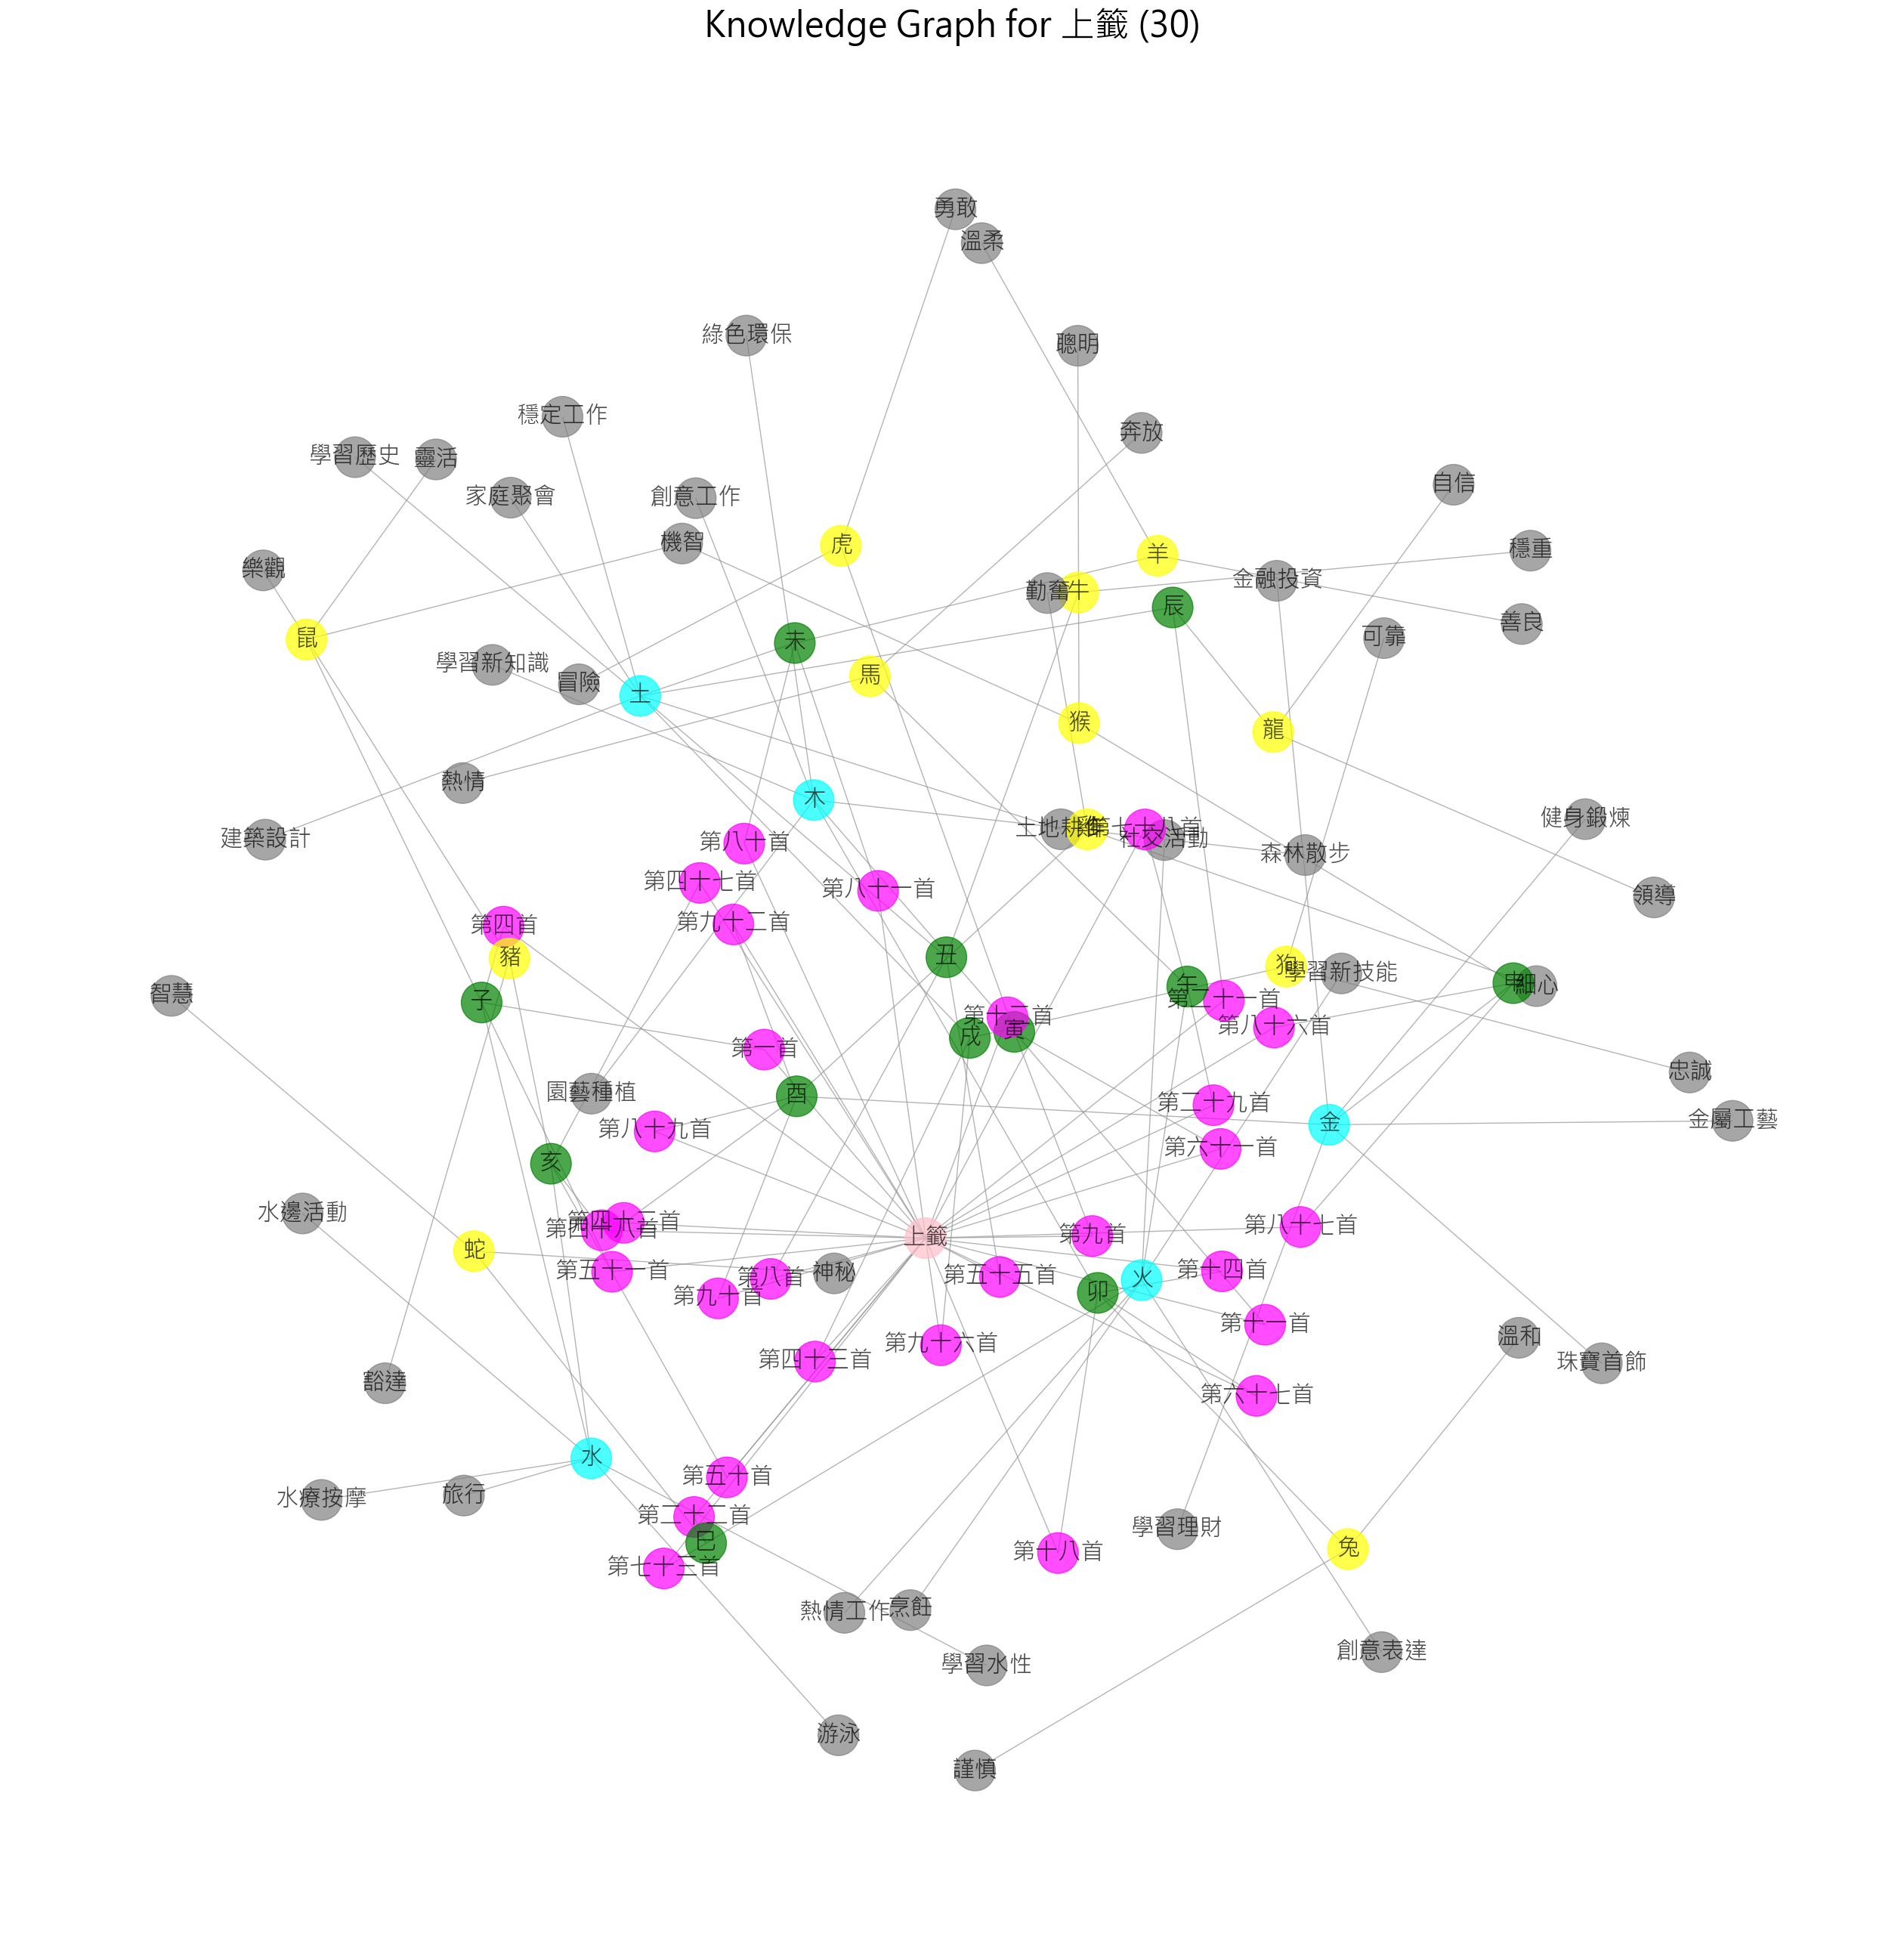

中籤 <class 'networkx.classes.graph.Graph'> 中籤 50


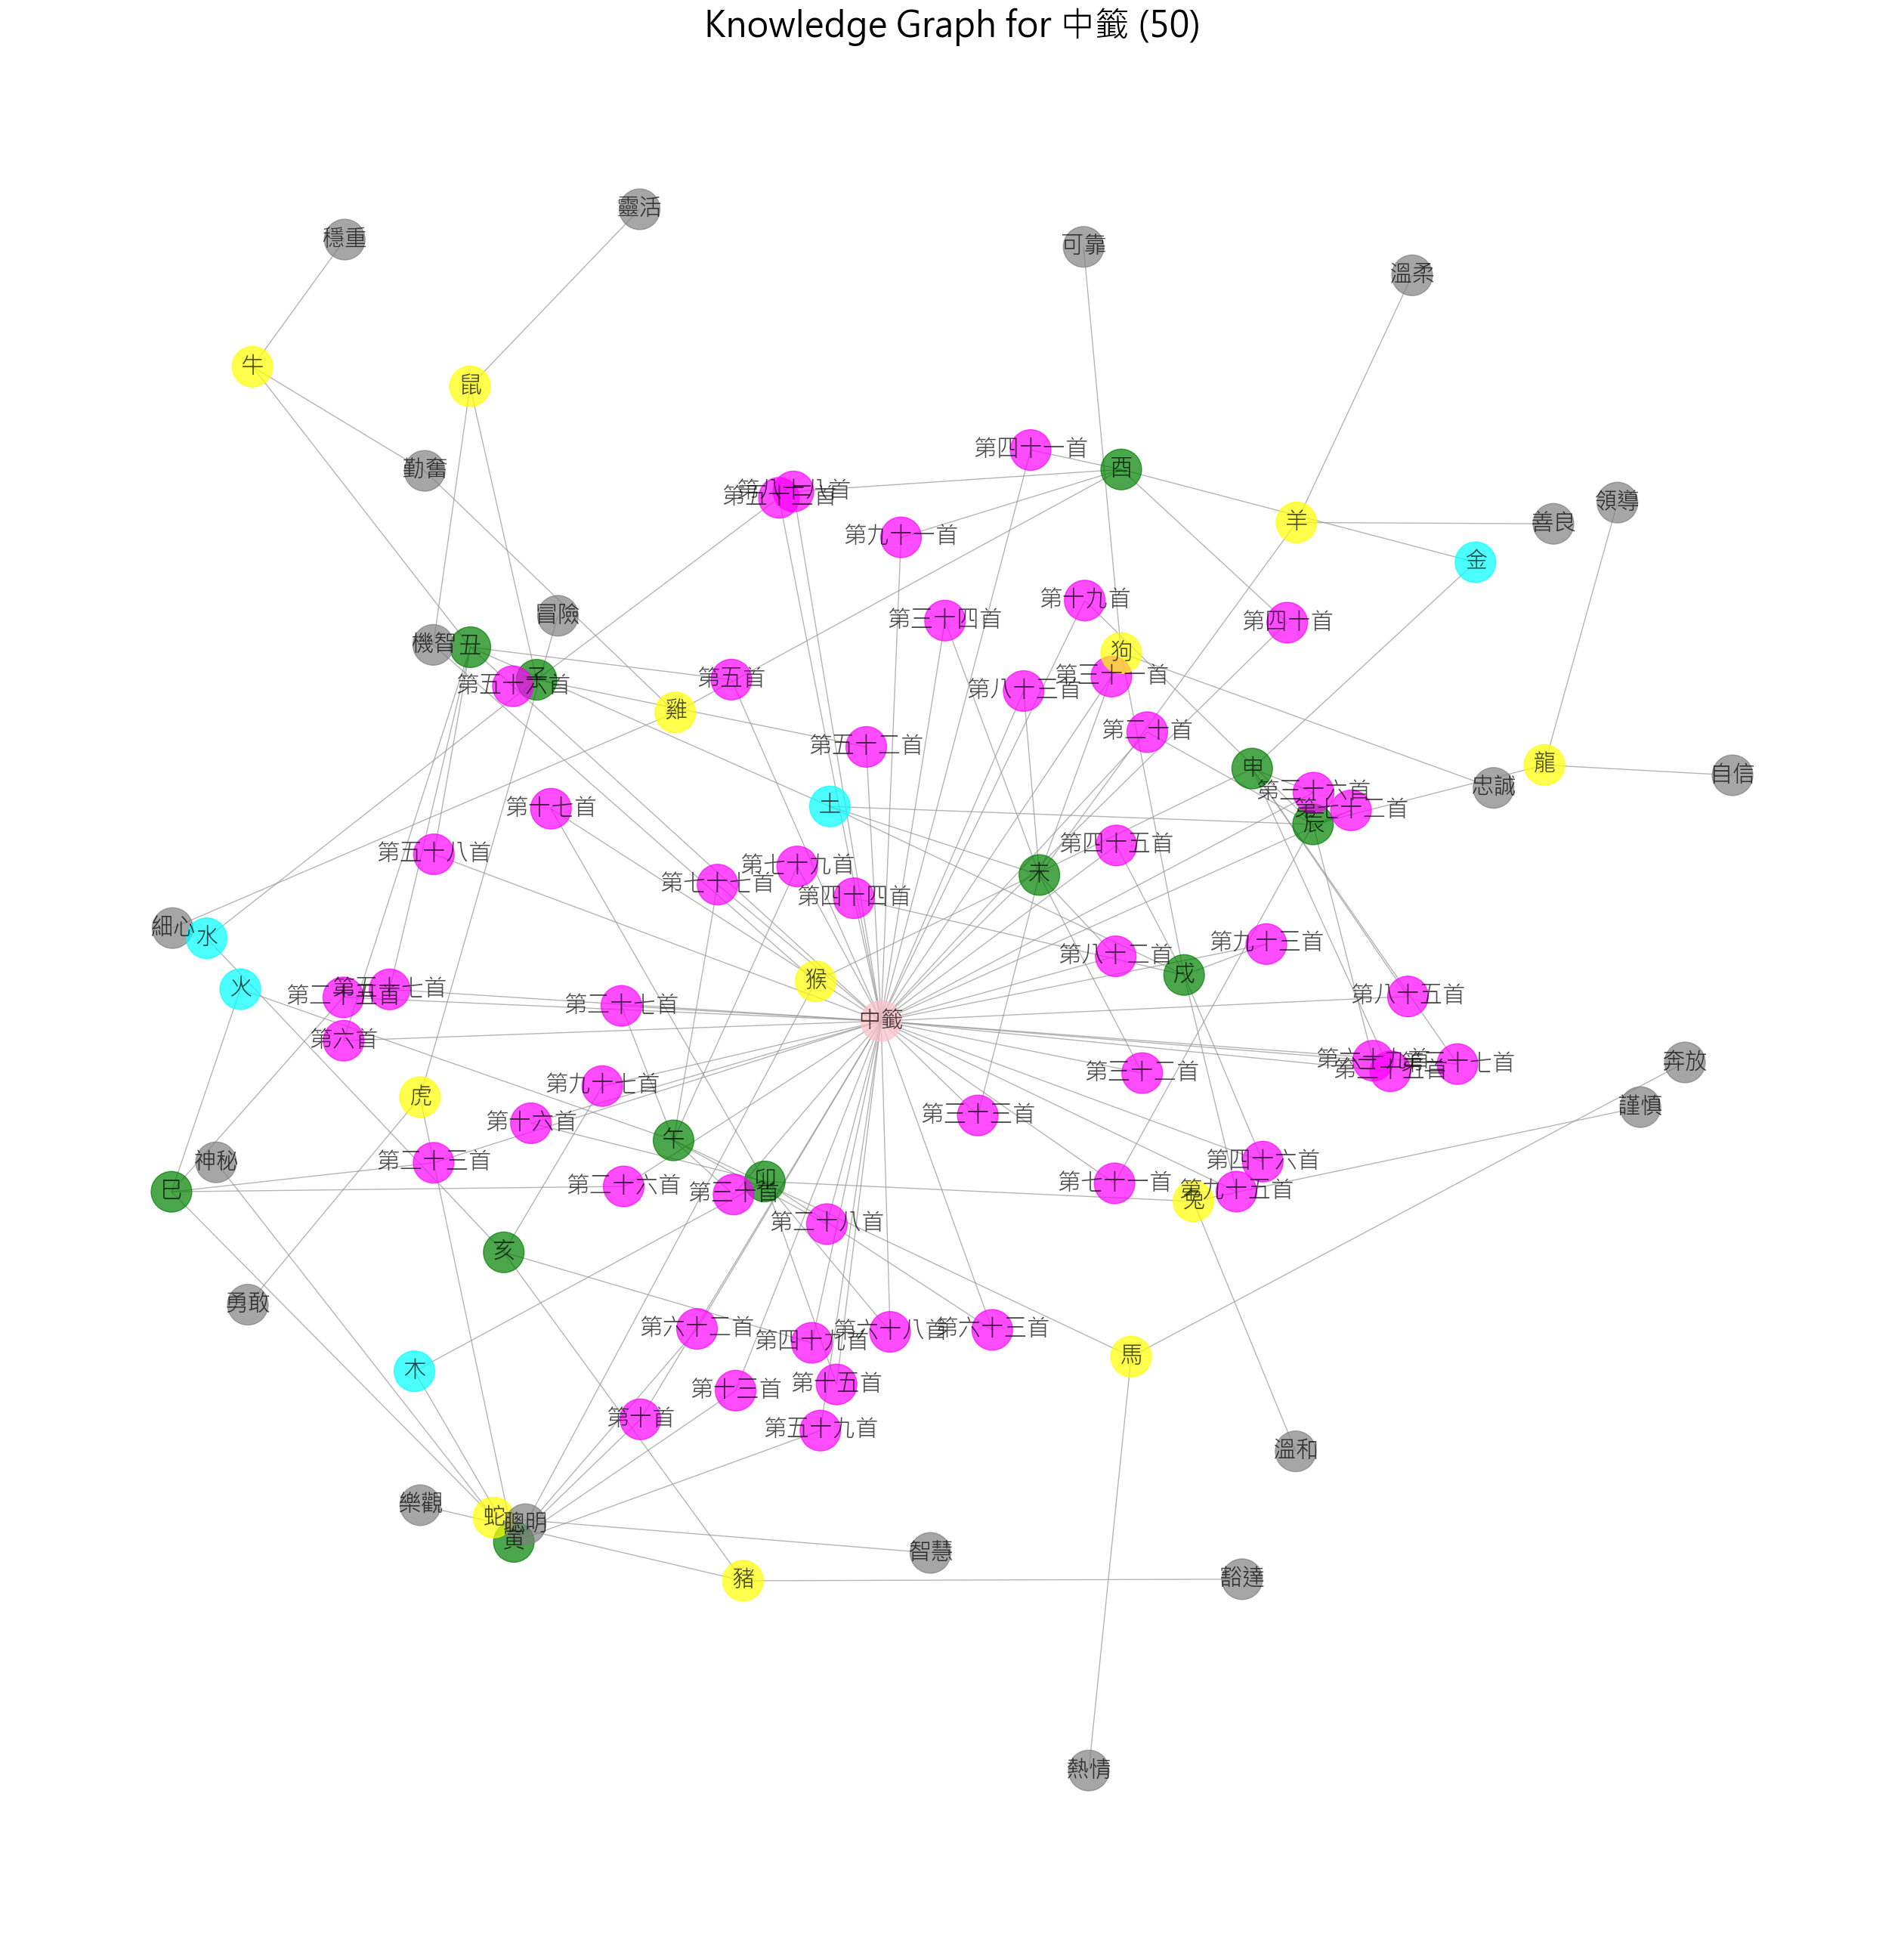

下籤 <class 'networkx.classes.graph.Graph'> 下籤 20


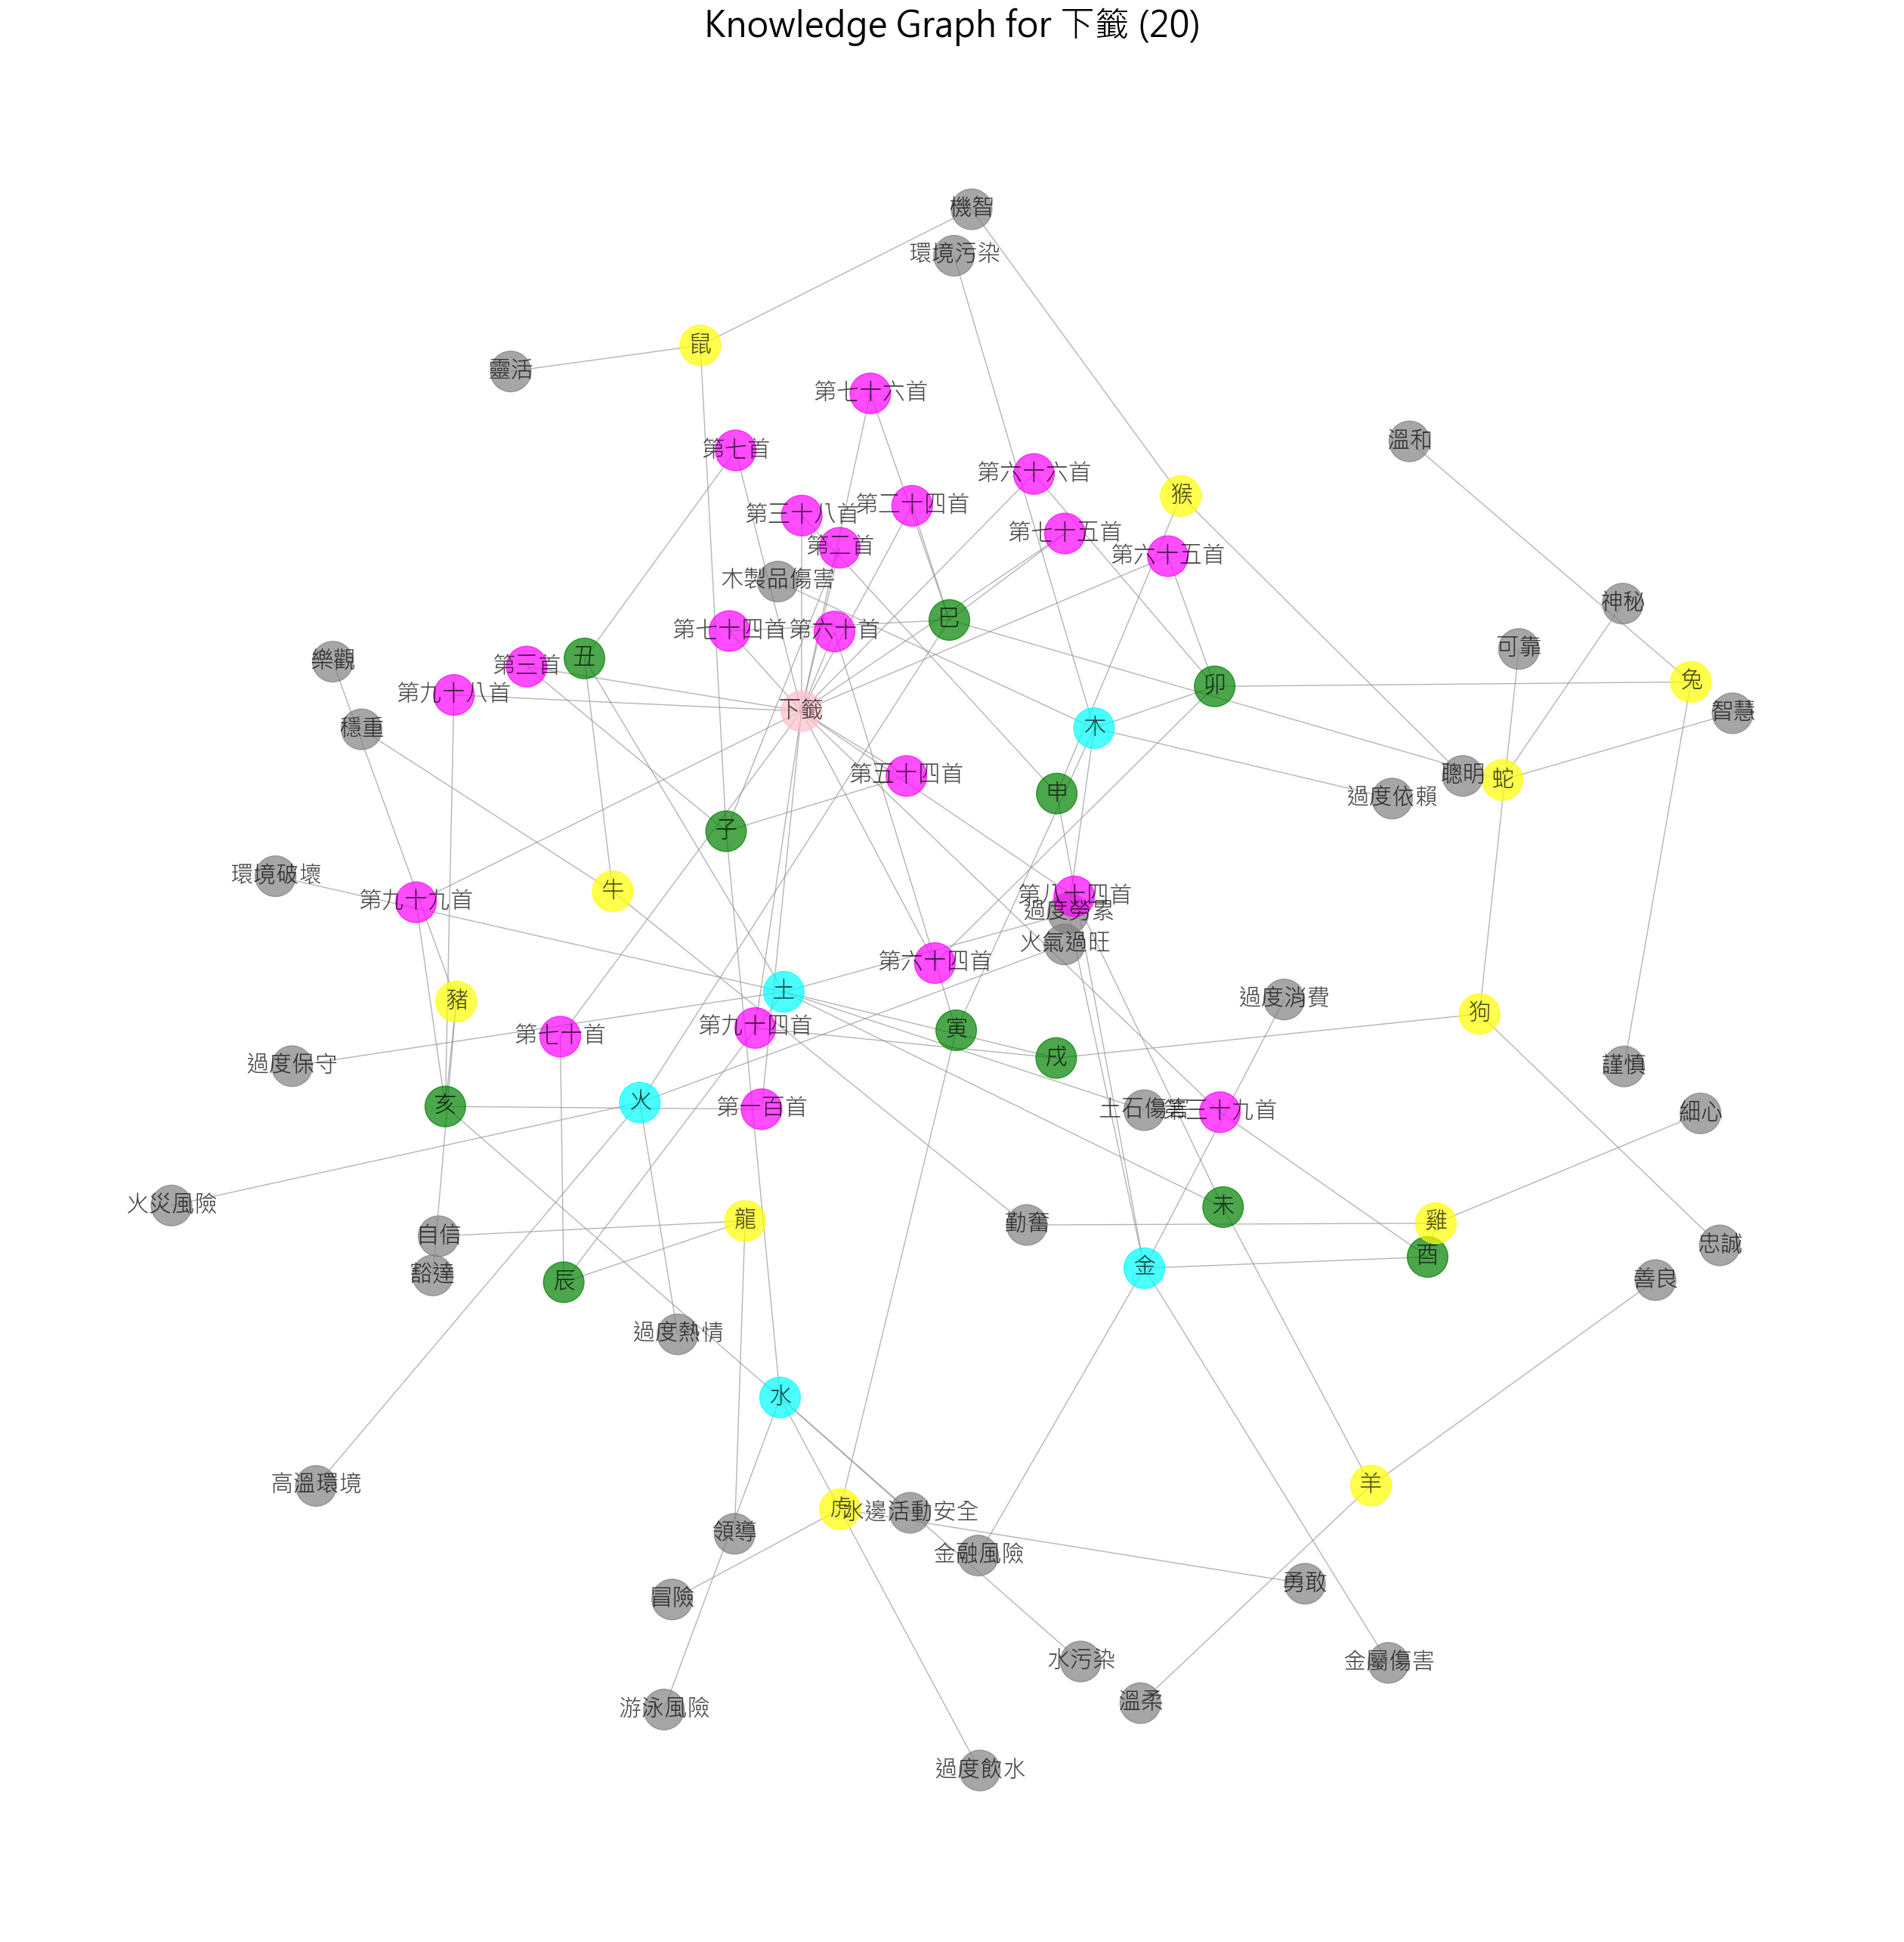

time: 4.52 s (started: 2024-12-16 09:54:16 +00:00)


In [ ]:
# Visualize 3 graphs
# Simply call GraphUtil.draw_all_graphs(), or iterate by the following logics


graphs = GraphUtil.graphs
for group, data in graphs.items():
    graph, group_name, count = data['G'], data['name'], data['count']
    print(group, type(graph), group_name, count)
    GraphUtil.draw_graph(graph=graph, meta=data)

#3.Neo4j Utilities

### Create the initial graph structure

```cypher
CREATE (p1:Poem {number: 1, name: "第一首", ...})
-[:HAS_BODY]->(s1:Body {籤詩: "籤詩x4", 吉凶: "上籤", ...})
-[:HAS_EARTH_BRANCH]->(e1:EarthlyBranch {name: "子", ...})
-[:HAS_PURPOSE]->(i1:DivineIntention {purpose: "疾病", purpose_embedding: [], ...})
-[:HAS_PURPOSE_ANSWER]->(a1:PurposeAnswer {purpose: '疾病', answer: "'有驚'", answer_embedding: [], ...})
WITH p1, e1
MERGE (e1)-[:HAS_FIVE_ELEMENT]->(f1:FiveElement {name: "水"})
MERGE (e1)-[:HAS_ZODIAC]->(z1:Zodiac {name: "鼠"})
```

### Add a UserPrompt

```cypher
MATCH (p:Poem {number: $poem_number})
CREATE (up:UserPrompt {text: "求身體健康", llm_response: "good luck!", purpose_embedding: [], llm_response_embedding: []...})
-[:GENERATED_BY]->(l:LLM {model: $model, temperature: $temperature, max_tokens: $max_tokens})
CREATE (p)-[:HAS_PROMPT]->(up)
```

### Simple Search

```cypher
MATCH (p:Poem {number: 1})
MATCH (p)-[:HAS_BODY]->(b)
MATCH (p)-[:HAS_PURPOSE]->(i)
MATCH (i)-[:HAS_PURPOSE_ANSWER]->(a)
MATCH (p)-[:HAS_EARTH_BRANCH]->(e)
MATCH (e)-[:HAS_FIVE_ELEMENTS]->(f)
MATCH (e)-[:HAS_ZODIAC]->(z)
RETURN p.name, b.籤名, i.purpose, a.answer, e.name as 地支, f.name as 五行, z.name as 生肖, ...
```

### Similarity Search

```cypher
MATCH (p:Poem {number: 1})-[:HAS_PROMPT]->(up:UserPrompt)
OPTIONAL MATCH (up)-[:GENERATED_BY]->(llm:LLM)
WITH up, llm, gds.similarity.cosine(up.purpose_embedding, $new_userprompt_embedding) AS similarity
WHERE similarity > 0.75
RETURN similarity, up.llm_response, llm.model...
ORDER BY similarity DESC
LIMIT 3
```


## Neo4jImporter


In [74]:
from neo4j import Driver, Session


class Neo4jImporter:
    """Neo4j Utilities for importing data into the Neo4j database."""

    @staticmethod
    def delete_all_data(driver: Driver) -> bool:
        """Delete all nodes and relationships in the database."""

        try:
            with driver.session() as session:
                delete_query = """
                MATCH (n)
                DETACH DELETE n
                """
                session.run(delete_query)
                print("All data has been deleted from the Neo4j database.")
            return True
        except Exception as e:
            print(f"Error deleting all data: {e}")
            return False

    @staticmethod
    def initial_element_graph(session: Session) -> None:
        """Initialize the Five Element graph."""

        for element_name in ELEMENTs:
            print(f'Adding FiveElement: {element_name} ...')
            query = """
            MERGE (element:FiveElement {name: $element_name})
            """
            session.run(query, {'element_name': element_name})

        for element_name in ELEMENTs:
            element_inc = ELEMENT_CYCLE_MAP[element_name]['生']
            element_dec = ELEMENT_CYCLE_MAP[element_name]['剋']

            print(f'Adding INC_ELEMENT: {element_name}->{element_inc} ...')
            query = """
            MATCH (element:FiveElement {name: $element_name})
            MATCH (good:FiveElement {name: $name})
            MERGE (element)-[:INC_ELEMENT]->(good)
            """
            session.run(
                query, {'element_name': element_name, 'name': element_inc})

            print(f'Adding DEC_ELEMENT: {element_name} -> {element_dec} ...')
            query = """
            MATCH (element:FiveElement {name: $element_name})
            MATCH (bad:FiveElement {name: $name})
            MERGE (element)-[:DEC_ELEMENT]->(bad)
            """
            session.run(
                query, {'element_name': element_name, 'name': element_dec})

            goods = [{'name': advice}
                     for advice in ELEMENT_ADVICE[element_name]['上籤']]
            bads = [{'name': advice}
                    for advice in ELEMENT_ADVICE[element_name]['下籤']]

            for good in goods:
                good_name = good['name']
                print(
                    f'Adding HAS_AUSPICIOUS: {element_name}->{good_name} ...')

                query = """
                MATCH (element:FiveElement {name: $element_name})
                MERGE (good:Auspicious {name: $name})
                MERGE (element)-[:HAS_AUSPICIOUS]->(good)
                """
                session.run(
                    query, {'element_name': element_name, 'name': good_name})

            for bad in bads:
                bad_name = bad['name']
                print(
                    f'Adding HAS_INAUSPICOUS: {element_name}->{bad_name} ...')

                query = """
                MATCH (element:FiveElement {name: $element_name})
                MERGE (bad:Inauspicious {name: $name})
                MERGE (element)-[:HAS_INAUSPICOUS]->(bad)
                """
                session.run(
                    query, {'element_name': element_name, 'name': bad_name})
        print("Extended element graph created successfully!")

    @staticmethod
    def initial_zi_graph(session: Session) -> None:
        """Initialize the Earthly Branch (Zi) graph."""

        branches = [
            {
                'branch_name': zi_name,
                'location': ZI_LOC_MAP[zi_name]['location'],
                'time': ZI_LOC_MAP[zi_name]['time'],
            }
            for zi_name in ZIs
        ]

        for branch_data in branches:
            print(f'Adding EarthlyBranch: {branch_data["branch_name"]} ...')
            query = """
            MERGE (branch:EarthlyBranch {name: $branch_name, location: $location, time: $time})
            """
            session.run(query, branch_data)

        for branch_data in branches:
            branch_name = branch_data['branch_name']
            element_name = ZI_ELEMENT_MAP[branch_name]
            print(f'Adding HAS_ELEMENT: {branch_name} -> {element_name} ...')

            query = """
            MATCH (branch:EarthlyBranch {name: $branch_name})
            MATCH (element:FiveElement {name: $element_name})
            MERGE (branch)-[:HAS_ELEMENT]->(element)
            """
            session.run(query, {'branch_name': branch_name,
                        'element_name': element_name})
        print("Initial Zi graph created successfully!")

    @staticmethod
    def initial_zodiac_graph(session: Session) -> None:
        """Initialize the Zodiac graph."""

        for zodiac_name in ZODIACs:
            print(f'Adding Zodiac: {zodiac_name} ...')
            query = """
            MERGE (zodiac:Zodiac {name: $zodiac_name})
            """
            session.run(query, {'zodiac_name': zodiac_name})

            personalities = [{'name': name}
                             for name in ZODIAC_ATTR_MAP[zodiac_name]['personalities']]
            works = [{'name': name}
                     for name in ZODIAC_ATTR_MAP[zodiac_name]['works']]

            for personality in personalities:
                name = personality['name']
                print(f'Adding HAS_PERSONALITY: {zodiac_name} -> {name} ...')

                query = """
                MATCH (zodiac:Zodiac {name: $zodiac_name})
                MERGE (personality:Personality {name: $name})
                MERGE (zodiac)-[:HAS_PERSONALITY]->(personality)
                """
                session.run(query, {'zodiac_name': zodiac_name, 'name': name})

            for work in works:
                name = work['name']
                print(f'Adding HAS_OCCUPATION: {zodiac_name} -> {name} ...')

                query = """
                MATCH (zodiac:Zodiac {name: $zodiac_name})
                MERGE (career:Occupation {name: $name})
                MERGE (zodiac)-[:HAS_OCCUPATION]->(career)
                """
                session.run(query, {'zodiac_name': zodiac_name, 'name': name})
        print("Initial Zodiac graph created successfully!")

    @staticmethod
    def initial_divine_graph(session: Session, contexts: list[dict]) -> None:
        """Initialize the Divine Intention graph."""

        divine_map: dict[str, set] = {}
        for data in contexts:
            divine_pairs = {k: v for k,
                            v in data['聖意'].items() if k and v and v not in ['__', '未指示']}
            for k, v in divine_pairs.items():
                divine_map.setdefault(k, set()).add(v)

        for purpose, answers in divine_map.items():
            divine_data = {
                'purpose': purpose,
                'purpose_embedding': TokenizerUtil.get_word_embedding(purpose),
            }

            print(f'Adding DivineIntention: {purpose} ...')
            query = """
            MERGE (purpose:DivineIntention {purpose: $purpose, purpose_embedding: $purpose_embedding})
            """
            session.run(query, divine_data)

            for answer in answers:
                answer_data = {
                    'purpose': purpose,
                    'answer': answer,
                    'answer_embedding': TokenizerUtil.get_word_embedding(answer),
                }

                print(f'Adding HAS_ANSWER: {purpose} -> {answer} ...')
                query = """
                MATCH (p:DivineIntention {purpose: $purpose})
                MERGE (answer:DivineAnswer {answer: $answer, answer_embedding: $answer_embedding})
                MERGE (p)-[:HAS_ANSWER]->(answer)
                """
                session.run(query, answer_data)
        print("Initial Divine graph created successfully!")

    @staticmethod
    def initial_poem_graph(session: Session, contexts: list[dict]) -> None:
        """Initialize the Poem graph."""

        for data in contexts:
            poem_number = data['id'] + 1
            poem_data = {
                'number': poem_number,
                'name': f"{data['籤名']} - {data['詩名']}",
                'system_prompt': SYS_PROMPT_TPL,
                'context': data['context'],
                'context_embedding': TokenizerUtil.get_word_embedding(data['context']),
            }

            body_data = {
                '籤名': data['籤名'],
                '詩名': data['詩名'],
                '吉凶': data['吉凶'],
                '詩運': data['詩運'],
                '籤詩': data['籤詩'],
                '宮位': data['宮位'],
                '詩意': data['詩意'],
                '聖意': PoemUtil.str_divine(data['聖意']),
                '解曰': data['解曰'],
                '淺釋': data['淺釋'],
                '靈籤': data['靈籤'],
                '詳解': data['詳解'],
                '地支': data['宮位'][0],
                '生肖': ZI_ZODIAC_MAP[data['宮位'][0]],
                '五行': ZI_ELEMENT_MAP[data['宮位'][0]],
                '四季': ZI_SEASON_MAP[data['宮位'][0]],
            }

            print(f'Adding Poem: {poem_number} ...')
            query = """
            MERGE (p:Poem {number: $number, name: $name, system_prompt: $system_prompt, context: $context, context_embedding: $context_embedding})
            MERGE (body:Body {籤名: $籤名, 詩名: $詩名, 吉凶: $吉凶, 詩運: $詩運, 籤詩: $籤詩, 宮位: $宮位, 詩意: $詩意, 聖意: $聖意, 解曰: $解曰, 淺釋: $淺釋, 靈籤: $靈籤, 詳解: $詳解, 地支: $地支, 生肖: $生肖, 五行: $五行, 四季: $四季})
            MERGE (p)-[:HAS_BODY]->(body)
            """
            session.run(query, {**poem_data, **body_data})
        print("Initial Poem graph created successfully!")

    @staticmethod
    def extend_poem_to_zi_graph(session: Session, contexts: list[dict]) -> None:
        """Extend Poem graph with Earthly Branch relationships."""

        for data in contexts:
            poem_number = data['id'] + 1
            zi_name = data['宮位'][0]

            print(
                f'Adding HAS_EARTH_BRANCH: Poem-{poem_number}->{zi_name} ...')

            query = """
            MATCH (p:Poem {number: $number})
            MATCH (branch:EarthlyBranch {name: $name})
            MERGE (p)-[:HAS_EARTH_BRANCH]->(branch)
            """
            session.run(query, {'number': poem_number, 'name': zi_name})

        print("Related Poem graph created successfully!")

    @staticmethod
    def extend_poem_to_purpose_graph(session: Session, contexts: list[dict]) -> None:
        """Extend Poem graph with Divine Intention relationships."""

        for data in contexts:
            poem_number = data['id'] + 1
            valid_purposes = {k: v for k,
                              v in data['聖意'].items() if k and v and v not in ['__', '未指示']}

            for purpose, answer in valid_purposes.items():
                purpose_data = {
                    'purpose': purpose,
                    'answer': answer,
                    'purpose_embedding': TokenizerUtil.get_word_embedding(purpose),
                    'answer_embedding': TokenizerUtil.get_word_embedding(answer),
                }

                print(f'Adding HAS_PURPOSE: Poem-{poem_number}->{purpose} ...')
                query = """
                MATCH (p:Poem {number: $number})
                MATCH (purpose:DivineIntention {purpose: $purpose})
                MERGE (answer:PurposeAnswer {purpose: $purpose, answer: $answer, purpose_embedding: $purpose_embedding, answer_embedding: $answer_embedding})
                MERGE (p)-[:HAS_PURPOSE]->(purpose)
                MERGE (p)-[:HAS_PURPOSE_ANSWER]->(answer)
                """
                session.run(query, {'number': poem_number, **purpose_data})

        print("Extended Poem to Purpose graph created successfully!")

time: 5 ms (started: 2024-12-17 06:06:52 +00:00)


time: 1.24 ms (started: 2024-12-17 03:37:41 +00:00)


####Check divine data
聖意


In [64]:
divine_map: dict[str, set] = {}
for data in all_contexts:
    divine_pairs = {k: v for k,
                    v in data['聖意'].items() if k and v and v != '__'}
    for k, v in divine_pairs.items():
        if k not in divine_map:
            divine_map[k] = set()
        divine_map[k].add(v)

for divine, answers in divine_map.items():
    print(divine, answers)

家宅 {'欠安', '口舌', '亂', '清吉', '祈保（吉）', '損失', '欠利', '憂疑', '安', '慎出', '若前', '許願', '吉利', '凶', '吉', '平安', '平吉', '欠安（大吉）', '心只', '還願', '大利', '祈福', '大吉', '守舊', '平平', '平常', '祈保', '中平', '不利', '作福', '先凶后吉', '不安', '利', '不利（漸安）', '旺'}
自身 {'阻滯', '口舌', '欠吉（先凶后吉）', '災耗', '謹防（凶中有吉）', '謹慎', '欠吉（凶。注意健康）', '夏秋吉', '欠利', '安', '謹防', '守慎', '吉隨', '許經', '泰', '吉利', '阻', '順', '吉', '提防', '路行', '平', '還願', '順利', '祈福', '順利（不順）', '安（運滯。唯仁可解）', '秋冬大利', '中吉', '平平', '是非', '平常', '冬吉', '祈保', '康泰', '小人', '吉（待運至）', '秋冬吉', '險', '不利', '防', '困滯', '秋冬旺', '還願（大吉）', '中平', '平穩', '作福', '利', '利安'}
求財 {'阻滯', '虛', '謹慎', '好', '秋吉', '有', '欠利', '微微', '破失', '大前', '春旺', '守慎', '中平（休想）', '未遇', '西方', '阻', '順', '吉', '謹守', '秋旺', '正勝', '佳順', '勞力', '春利', '未有', '合', '大利', '遂', '秋冬大利', '勞心', '中吉', '利西', '守份', '未成', '平平', '著力', '得利', '不平', '中平', '小人', '秋冬吉', '成', '順利（甭想）', '不利', '破', '秋冬旺', '遂意', '平常（切忌）', '順遂', '破耗', '難', '有利', '利', '頗有', '待時', '守待'}
交易 {'阻滯', '宜遲', '謹慎', '穩', '損失', '一可', '諸求', '謹防', '順利（且慢）', '阻', '吉', '平', '勝', '反覆', '難成', '合', '早斷

#4.Build a new neo4j database


## Connect to neo4j


In [ ]:
import os
from google.colab import userdata
from neo4j import GraphDatabase, Driver

if not os.environ.get('NEO4J_AUTH'):
    os.environ['NEO4J_AUTH'] = userdata.get('NEO4J_SANDBOX_nycu')
    os.environ['NEO4J_URL'] = userdata.get('NEO4J_SANDBOX_url')

if not os.environ.get('NEO4J_AUTH') or not os.environ.get('NEO4J_URL'):
    raise ValueError(
        'Please set the NEO4J_AUTH and URL environment variables.')

driver: Driver = GraphDatabase.driver(
    os.environ.get('NEO4J_URL'),  # 'bolt://44.212.25.177',
    auth=('neo4j', os.environ.get('NEO4J_AUTH'))
)

Neo4jUtil.test_neo4j_connection(driver)

1
Connection successful!
time: 1.11 s (started: 2024-12-16 15:20:20 +00:00)


##Import 100 poem


In [ ]:
# Start importing
current_driver_sandbox = driver
print(all_contexts[0])

if False:
    with current_driver_sandbox.session() as session:
        Neo4jImporter.initial_element_graph(session=session)
        Neo4jImporter.initial_zodiac_graph(session=session)
        Neo4jImporter.initial_zi_graph(session=session)
        Neo4jImporter.initial_divine_graph(
            session=session, contexts=all_contexts)
        Neo4jImporter.initial_poem_graph(
            session=session, contexts=all_contexts)

        Neo4jImporter.extend_poem_to_zi_graph(
            session=session, contexts=all_contexts)
        Neo4jImporter.extend_poem_to_purpose_graph(
            session=session, contexts=all_contexts)
        pass

Adding FiveElement: 金 ...
Adding FiveElement: 木 ...
Adding FiveElement: 水 ...
Adding FiveElement: 火 ...
Adding FiveElement: 土 ...
Adding INC_ELEMENT: 金 -> 水 ...
Adding DEC_ELEMENT: 金 -> 木 ...
Adding HAS_AUSPICIOUS: 金 -> 健身鍛煉 ...
Adding HAS_INAUSPICOUS: 金 -> 過度勞累 ...
Adding INC_ELEMENT: 木 -> 火 ...
Adding DEC_ELEMENT: 木 -> 土 ...
Adding HAS_AUSPICIOUS: 木 -> 綠色環保 ...
Adding HAS_INAUSPICOUS: 木 -> 環境污染 ...
Adding INC_ELEMENT: 水 -> 木 ...
Adding DEC_ELEMENT: 水 -> 火 ...
Adding HAS_AUSPICIOUS: 水 -> 水療按摩 ...
Adding HAS_INAUSPICOUS: 水 -> 水污染 ...
Adding INC_ELEMENT: 火 -> 土 ...
Adding DEC_ELEMENT: 火 -> 金 ...
Adding HAS_AUSPICIOUS: 火 -> 創意表達 ...
Adding HAS_INAUSPICOUS: 火 -> 火氣過旺 ...
Adding INC_ELEMENT: 土 -> 金 ...
Adding DEC_ELEMENT: 土 -> 水 ...
Adding HAS_AUSPICIOUS: 土 -> 家庭聚會 ...
Adding HAS_INAUSPICOUS: 土 -> 環境破壞 ...
Extended element graph created successfully!
Adding Zodiac: 龍 ...
Adding Personality: 自信 ...
Adding HAS_PERSONALITY: 龍 -> 自信 ...
Adding Personality: 領導 ...
Adding HAS_PERSONALITY: 龍 -> 領

## Import LLM response (chatgpt, claude)


###### chatgpt


In [ ]:
# Usage
current_driver_sandbox = driver

# chatgpt
if False:
    poem_number = 57
    with current_driver_sandbox.session() as session:
        for data in all_chatgpt_responses:
            prompt = [msg['content']
                      for msg in data['messages'] if msg['role'] == 'user'][0]
            llm_response = data['response_text']
            model = data['model']
            temperature = data['temperature']
            max_tokens = data['max_tokens'] or 512
            print(f'Poem-{poem_number}: {prompt[:10]} -> {llm_response[:20]}')

            Neo4jUtil.update_poem_with_user_prompt(
                session=session,
                poem_number=poem_number,
                prompt=prompt,
                llm_response=llm_response,
                model=model,
                temperature=temperature,
                max_tokens=max_tokens,
            )

Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem succes

###### claude


In [ ]:
# Usage
current_driver_sandbox = driver

if False:
    poem_number = 57
    with current_driver_sandbox.session() as session:
        for data in all_claude_responses:
            prompt = [msg['content']
                      for msg in data['messages'] if msg['role'] == 'user'][0]
            llm_response = data['response_text']
            model = data['model']
            temperature = data['temperature']
            max_tokens = data['max_tokens'] or 512
            print(f'Poem-{poem_number}: {prompt[:10]} -> {llm_response[:20]}')

            Neo4jUtil.update_poem_with_user_prompt(
                session=session,
                poem_number=poem_number,
                prompt=prompt,
                llm_response=llm_response,
                model=model,
                temperature=temperature,
                max_tokens=max_tokens,
            )

Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem successfully!
Poem-57: 最近身體欠佳, 請給 -> 您抽到的籤是: 【中籤】中中 第五十八首
Added a promt to the poem succes

#5.Test


## Sandbox instance


In [53]:
from google.colab import userdata
from neo4j import GraphDatabase, Driver

driver_sandbox: Driver = GraphDatabase.driver(
    'bolt://3.236.132.206:7687',
    auth=('neo4j', userdata.get('NEO4J_SANDBOX_nycu'))
)

Neo4jUtil.test_neo4j_connection(driver_sandbox)

1
Connection successful!
time: 1.6 s (started: 2024-12-17 00:42:13 +00:00)


### Test poem search


In [71]:
# Usage
current_driver_sandbox = driver_sandbox

if True:
    poem_number = 57
    with current_driver_sandbox.session() as session:
        results = Neo4jUtil.search_poem_data(
            session=session, poem_number=poem_number)
        # pprint(result[0])
        poem = results[0]['Poem'][0]
        poem.pop('context_embedding')
        body = results[0]['Body'][0]
        pprint(poem)
        pprint(body)

{'context': 'You are an assistant specialized in interpreting divination '
            'results. Use the following [Context] to provide insights and '
            'advice to users based on their questions. Always format your '
            'responses according to the [Response Format] below, ensuring '
            'personalized interpretations and actionable advice.\n'
            '\n'
            '[Response Format]\n'
            ' 您抽到的籤是: [Include 籤名 here]\n'
            ' 籤詩: [Include full 籤詩 here]\n'
            ' \n'
            '籤詩解讀: \n'
            '\n'
            '小廟公建議: \n'
            '\n'
            '[Context]\n'
            ' 籤名: 【中籤】上中 第五十七首-甯戚飯牛叩角\n'
            '\n'
            '\n'
            '~籤詩~\n'
            '聞是聞非風過耳     \n'
            '好衣好祿日當空     \n'
            '君須記取他年事     \n'
            '汝意還同我意同     \n'
            '\n'
            '此籤有"隨機應變"之意。鼓勵當事人，積極表現。有些人很懂得如何隨機應變，有時連身邊看似不起眼的物事，都可以適時拿來運用，成功地為自己加分不少。須知很多機會往往稍縱即逝，要能夠把握契機。即使看似希望渺茫，但仍值得一試，說不定就此一舉成功。在自己本身方

### Test similarity search


In [72]:
# Usage
current_driver_sandbox = driver_sandbox

if True:
    poem_number = 57
    with current_driver_sandbox.session() as session:
        results = Neo4jUtil.similarity_search_user_prompts(
            session=session,
            poem_number=poem_number,
            new_user_prompt='求健康',
            threshold=0.1,
            top_n=3
        )
        print(results[0]['similarity'], '\n', results[0])

        results = Neo4jUtil.similarity_search_user_prompts(
            session=session,
            poem_number=poem_number,
            new_user_prompt='最近身體欠佳, 請給予指示',
            threshold=0.1,
            top_n=3
        )
        print(results[0]['similarity'], '\n', results[0])

0.43610176264730816 
 <Record similarity=0.43610176264730816 user_prompt='最近身體欠佳, 請給予指示' llm_response='您抽到的籤是: 【中籤】中中 第五十八首-羅隱歸咎越王  \n籤詩: 忠言善語君須記 莫向他方求別藝 勸君安守舊生涯 除卻有餘都不是\n\n籤詩解讀:\n這首籤詩提醒您要謹記忠言和善意的建議，特別是在健康方面，不要輕易嘗試新的療法或偏方。當下最重要的是保持現有的生活方式，避免過度操勞和不必要的壓力。這段時間，請多關注身邊親友的建議，他們的關心可能會帶來有益的啟示。\n\n小廟公建議:\n- 關於自身: 此時對您的健康不利，建議您多加留意身體狀況，及早就醫，並遵循醫生的專業建議。\n- 關於疾病: 目前健康狀況可能不太穩定，建議您保持規律的作息，適當休息，並多攝取營養。\n- 地支「丑」提醒您，適合從事需要耐力和毅力的活動，但要避免過度勞累。\n\n請務必保重身體，保持樂觀心態，祝您早日康復！' llm_model='gpt-4o' llm_temperature=0.5 llm_max_tokens=512>
1.0 
 <Record similarity=1.0 user_prompt='最近身體欠佳, 請給予指示' llm_response='您抽到的籤是: 【中籤】中中 第五十八首-羅隱歸咎越王  \n籤詩: 忠言善語君須記 莫向他方求別藝 勸君安守舊生涯 除卻有餘都不是\n\n籤詩解讀:\n這首籤詩提醒您要謹記忠言和善意的建議，特別是在健康方面，不要輕易嘗試新的療法或偏方。當下最重要的是保持現有的生活方式，避免過度操勞和不必要的壓力。這段時間，請多關注身邊親友的建議，他們的關心可能會帶來有益的啟示。\n\n小廟公建議:\n- 關於自身: 此時對您的健康不利，建議您多加留意身體狀況，及早就醫，並遵循醫生的專業建議。\n- 關於疾病: 目前健康狀況可能不太穩定，建議您保持規律的作息，適當休息，並多攝取營養。\n- 地支「丑」提醒您，適合從事需要耐力和毅力的活動，但要避免過度勞累。\n\n請務必保重身體，保持樂觀心態，祝您早日康復！' llm_model='gpt-4o' llm_temperature=0.5 llm_max_tokens=512>
time

## Instance KW


In [79]:
from google.colab import userdata
from neo4j import GraphDatabase, Driver

driver_kw: Driver = GraphDatabase.driver(
    'neo4j+s://b8b653c3.databases.neo4j.io',
    auth=('neo4j', userdata.get('NEO4J_PASSWORD_kevinw'))
)

Neo4jUtil.test_neo4j_connection(driver_kw)

1
Connection successful!
time: 5.82 s (started: 2024-12-17 06:21:17 +00:00)


### store_poem_embeddings


In [77]:
import typing
from neo4j import Session


def store_poem_embeddings(
    session: Session,
    poem_number: int,
    context: str,
    purpose: str,  # 聖意 for inital and user_prompt for similar purposes
    metadata: dict = None,
    related_purposes: list[typing.Tuple[str, float]] = None
):
    print(f'Adding poem {poem_number}: {purpose} -> {context[:20]}...')

    context_embedding = TokenizerUtil.get_word_embedding(context)
    purpose_embedding = TokenizerUtil.get_word_embedding(purpose)

    query = """
    MERGE (p:Poem {number: $number})
    SET p.context_embedding = $context_embedding
    SET p.purpose_embedding = $purpose_embedding
    SET p.context = $context
    SET p.purpose = $purpose
    SET p.timestamp = timestamp()
    """

    params = {
        'number': poem_number,
        'context_embedding': context_embedding,
        'purpose_embedding': purpose_embedding,
        'context': context,
        'purpose': purpose,
    }

    if metadata:
        for key, val in metadata.items():
            query += f" SET p.{key} = '{val}'"
            params[key] = val

    if metadata and metadata.get('tags'):
        for tag in metadata['tags']:
            query += f", p:`{tag}`"

    try:
        session.run(query, params)
    except Exception as e:
        print(f"Error executing main query: {e}")
        return

    if related_purposes:
        for related_purpose, score in related_purposes:
            relate_query = """
            MATCH (p:Poem {number: $number})
            MERGE (rp:Purpose {name: $related_purpose})
            MERGE (p)-[:RELATED_TO {strength: $strength}]->(rp)
            """
            print(
                f'Adding poem {poem_number} RELATED_TO->{related_purpose}...')
            try:
                session.run(relate_query, {
                    'number': poem_number,
                    'related_purpose': related_purpose,
                    'strength': score  # 0.7 # Adjust on demand
                })
            except Exception as e:
                print(f"Errorcreating relationship for {related_purpose}: {e}")
                return

    if metadata and metadata.get('籤名'):
        poem_name = metadata['籤名']
        name_query = """
        MATCH (p:Poem {number: $number})
        MERGE (n:籤名 {name: $poem_name})
        MERGE (p)-[:HAS_NAME]->(n)
        """
        print(f'Adding poem {poem_number} HAS_NAME -> {poem_name}...')
        try:
            session.run(
                name_query, {'number': poem_number, 'poem_name': poem_name})
        except Exception as e:
            print(f"Error creating relationship for 籤名-{poem_name}: {e}")

    if metadata and metadata.get('地支'):
        zi = metadata['地支']
        zi_query = """
        MATCH (p:Poem {number: $number})
        MERGE (z:地支 {name: $zi})
        MERGE (p)-[:RELATED_TO]->(z)
        """
        print(f'Adding poem {poem_number} RELATED_TO -> {zi}...')
        session.run(zi_query, {'number': poem_number, 'zi': zi})

    if metadata and metadata.get('生肖'):
        zodiac = zi, metadata.get('生肖')
        zodiac_query = """
        MATCH (p:Poem {number: $number})
        MERGE (z:生肖 {name: $zodiac})
        MERGE (p)-[:RELATED_TO]->(z)
        """
        print(f'Adding poem {poem_number} RELATED_TO -> {zodiac}...')
        session.run(zodiac_query, {'number': poem_number, 'zodiac': zodiac})

    if metadata and metadata.get('五行'):
        element = zi, metadata.get('五行')
        element_query = """
        MATCH (p:Poem {number: $number})
        MERGE (e:五行 {name: $element})
        MERGE (p)-[:RELATED_TO]->(e)
        """
        print(f'Adding poem {poem_number} RELATED_TO -> {element}...')
        session.run(element_query, {'number': poem_number, 'element': element})

time: 8.72 ms (started: 2024-12-17 06:20:31 +00:00)


### query_poem

- Similarity computing
- Alternative for gds.similarity.cosine


In [76]:
import numpy as np
from neo4j import Session
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine


def pairwise_cosine_similarity(vec1: list[float], vec2: list[float]) -> float:
    return cosine_similarity(vec1, vec2)[0][0]


def distance_cosine_similarity(vec1: list[float], vec2: list[float]) -> float:
    return 1 - cosine(vec1, vec2)


def query_poem_cosine(
    session: Session,
    poem_number: int,  # one-based
    purpose: str  # user prompt
):
    """Search similarity by cosine computing"""

    purpose_embedding = TokenizerUtil.get_word_embedding(purpose)
    query = """
    MATCH (p:Poem {number: $number})
    RETURN p.context AS context,
           p.purpose_embedding AS purpose_embedding
    """
    result = session.run(query, {
        'number': poem_number
    }).single()

    poem_embedding = result['purpose_embedding']
    purpose_vec = np.array(purpose_embedding).reshape(1, -1)
    poem_vec = np.array(poem_embedding).reshape(1, -1)

    # similarity = cosine_similarity(purpose_vec, poem_vec)[0][0]
    similarity = pairwise_cosine_similarity(purpose_vec, poem_vec)

    return {
        'context': result['context'],
        'similarity': similarity
    }


def query_poem_gds(
    session: Session,
    poem_number: int,  # one-based
    purpose: str  # user prompt
):
    """Search similarity by neo4j built-in gds.similarity.cosine computing"""

    purpose_embedding = embedding_model.encode(purpose).tolist()
    query = """
    MATCH (p:Poem {number: $number})
    RETURN p.context,
           gds.similarity.cosine(p.purpose_embedding, $purpose_embedding) as similarity
    """
    result = session.run(query, {
        'number': poem_number,
        'purpose_embedding': purpose_embedding
    })
    return result.single()

time: 3.14 ms (started: 2024-12-17 06:20:27 +00:00)


### Dry run


In [82]:
# Safe to delete all (testing db)
Neo4jImporter.delete_all_data(driver_kw)

current_driver_sandbox = driver_kw

with current_driver_sandbox.session() as session:
    poem_number = 1
    purpose = "健康"
    store_poem_embeddings(
        session=session,
        poem_number=poem_number,
        context="籤詩內容...",
        purpose=purpose
    )

    # Test searching ...
    result = query_poem_cosine(
        session=session,
        poem_number=poem_number,
        purpose=purpose
    )
    print(result)

All data has been deleted from the Neo4j database.
Adding poem 1: 健康 -> 籤詩內容......
{'context': '籤詩內容...', 'similarity': 1.0000000000000009}
time: 1.41 s (started: 2024-12-17 06:22:07 +00:00)


In [83]:
# Test querying
poem_number = 1
current_driver_sandbox = driver_kw
with current_driver_sandbox.session() as session:
    purpose = "健康"
    result = query_poem_cosine(
        session=session,
        poem_number=poem_number,
        purpose=purpose
    )
    print(result)

    purpose = "求健康"
    result = query_poem_cosine(
        session=session,
        poem_number=poem_number,
        purpose=purpose
    )
    print(result)

    purpose = "祈求身體健康"
    result = query_poem_cosine(
        session=session,
        poem_number=poem_number,
        purpose=purpose
    )
    print(result)

{'context': '籤詩內容...', 'similarity': 1.0000000000000009}
{'context': '籤詩內容...', 'similarity': 0.9739857499110268}
{'context': '籤詩內容...', 'similarity': 0.5717023836418955}
time: 1.11 s (started: 2024-12-17 06:22:22 +00:00)
